# Mervyn Chan 2019 August 7th
## This page shows the results of a k-fold cross validation analysis for a convolutional neural network (CNN) trained on 1758 magneto-rotational supernova waveforms from
### https://zenodo.org/record/201145#.XGNwkXUzbCL
## and 26 neutrino driven waveforms from
### https://sntheory.org/ottetal2013

### https://sntheory.org/murphyetal2009

### https://sntheory.org/ott2009

## The network was trained to classify which class among "Neutrino-driven, Magneto-rotational, Background" the input data belonged to.

## Data generation procedure
### 1. 1758 magnetorational waveforms and 26 neutrino waveforms were used.
### 2. These original waveforms were first passed through a low filter to filter out low frequency component (< 11 Hz).
### 3. A tukey window with alpha = 0.08 was then applied to every waveform.
### 4. The waveform with the longest length was then identified, each of the rest waveforms was zero-padded to this length.
### 5. 26 neutrino waveforms were then duplicated 67 times so that the number of them was roughly equal to the number of magnetorotational waveforms.
### 6. 1758 magnetorotational waves + 1742 neutrino waveforms = 3500 waveforms.
### 7. Since some of the studies provide only h+, while the others provide h+ and hx, the above 3500 waveforms contain both h+, hx. For 
###    studies that provide only h+, a vector of zeros of the same length is provided as hx.     
### 8. 120,000 noise realisations were generated for each detector in a network of 3 detectors: H L V, each of which was 1.7 times as long as the waveforms.
### 9. The 3500 waveforms (h+ and hx) were then duplicated 23 times making them 80500 in total.
### 9. 80500 sky locations were randomly chosen , and the antenna patten of each detector at those 80500 sky locations as well as the time delay between the detectors were computed.
### 10. The antenna pattens and time delays were then applied to the 80500 waveforms respectively,  and scaled to a certain network SNR. 
### 11. After step No. 10, 80500 of h(t) = Fp * hp + Fx * hc for each detector at different locations were obtained. 
### 12. 80500 h(t) samples were added to 80500 of the 120,000 noise realisations, with the start of the signals being randomised. 
###     Each detector had the same starting index in the corresponding noise realisation vector, this should not affect the time delay information, which had already been applied to prior to the addition.
### 13. For each source, the three h(t) for three detectors were then combined to form the training/validation/testing samples of the shape (3X1X8936). 
### 14. This means the 3 time series were used as 3 channels.

# Training
### The training process was similar to what had been previously done.
### A 10 fold cross validation analysis was carried out for each network SNR from 8 to 15.
### When the CNN had finished training for 1 SNR, it would turn to the next SNR by repeating steps 10 to 14 defined above.
### Some of the training parameters:
### 1. epochs: 30, batch size :32, learning rate = 0.0001
### Results
### Figure 1. Efficiency curves with fixed threshold for SNR from 8 to 15.
### Figure 2. Efficiency curves with fixed false alarm rate for SNR from 8 to 15.
### Figure 3. Log-scaled Roc curves for SNR from 8 to 15.
### Figure 4. Roc curves for SNR from 8 to 15.
### Figure 5. Roc curves at fixed convolution nerual network threshold for SNR from 8 to 15.
### Figure 6 to Figure 13. Confusion matrix for SNR from 8 to 15.
### Figure 14 to Figure 21. Loss plots for SNR = 8 to 15
### At the bottom: Current structure of the CNN

In [1]:
import Image
from IPython.display import display
import matplotlib.pyplot as plt

## Figure 1. Efficiency curves with fixed threshold for SNR from 8 to 15.


### This plot shows the efficiency curve as a function of SNR if the threshold is set to be a constant.
### This threshold is used when CNN tries to determine what class the input belongs to.
### When training a CNN to determine the class of an input, the output is probabilities that the input belongs to each of the classes.
### For the CNN to determine that an input belongs to a class, the corresponding probability has to be larger than a threshold. 
### In this case, the threshold is 50%.
### To compare to Figure 6 in Astone, et al, 2018,
### https://arxiv.org/abs/1812.05363
### one should focuse on the red solid line "True alarm probability for all signal classes"
### and the red dashed line  "True alarm probability for all classes"
### This is because it is not entirely clear to me which curve is actually meant in the paper, so two were produced.
### To compare to the red line in the same figure in that paper, one should focus on the blue solid line "False alarm rate for signals"

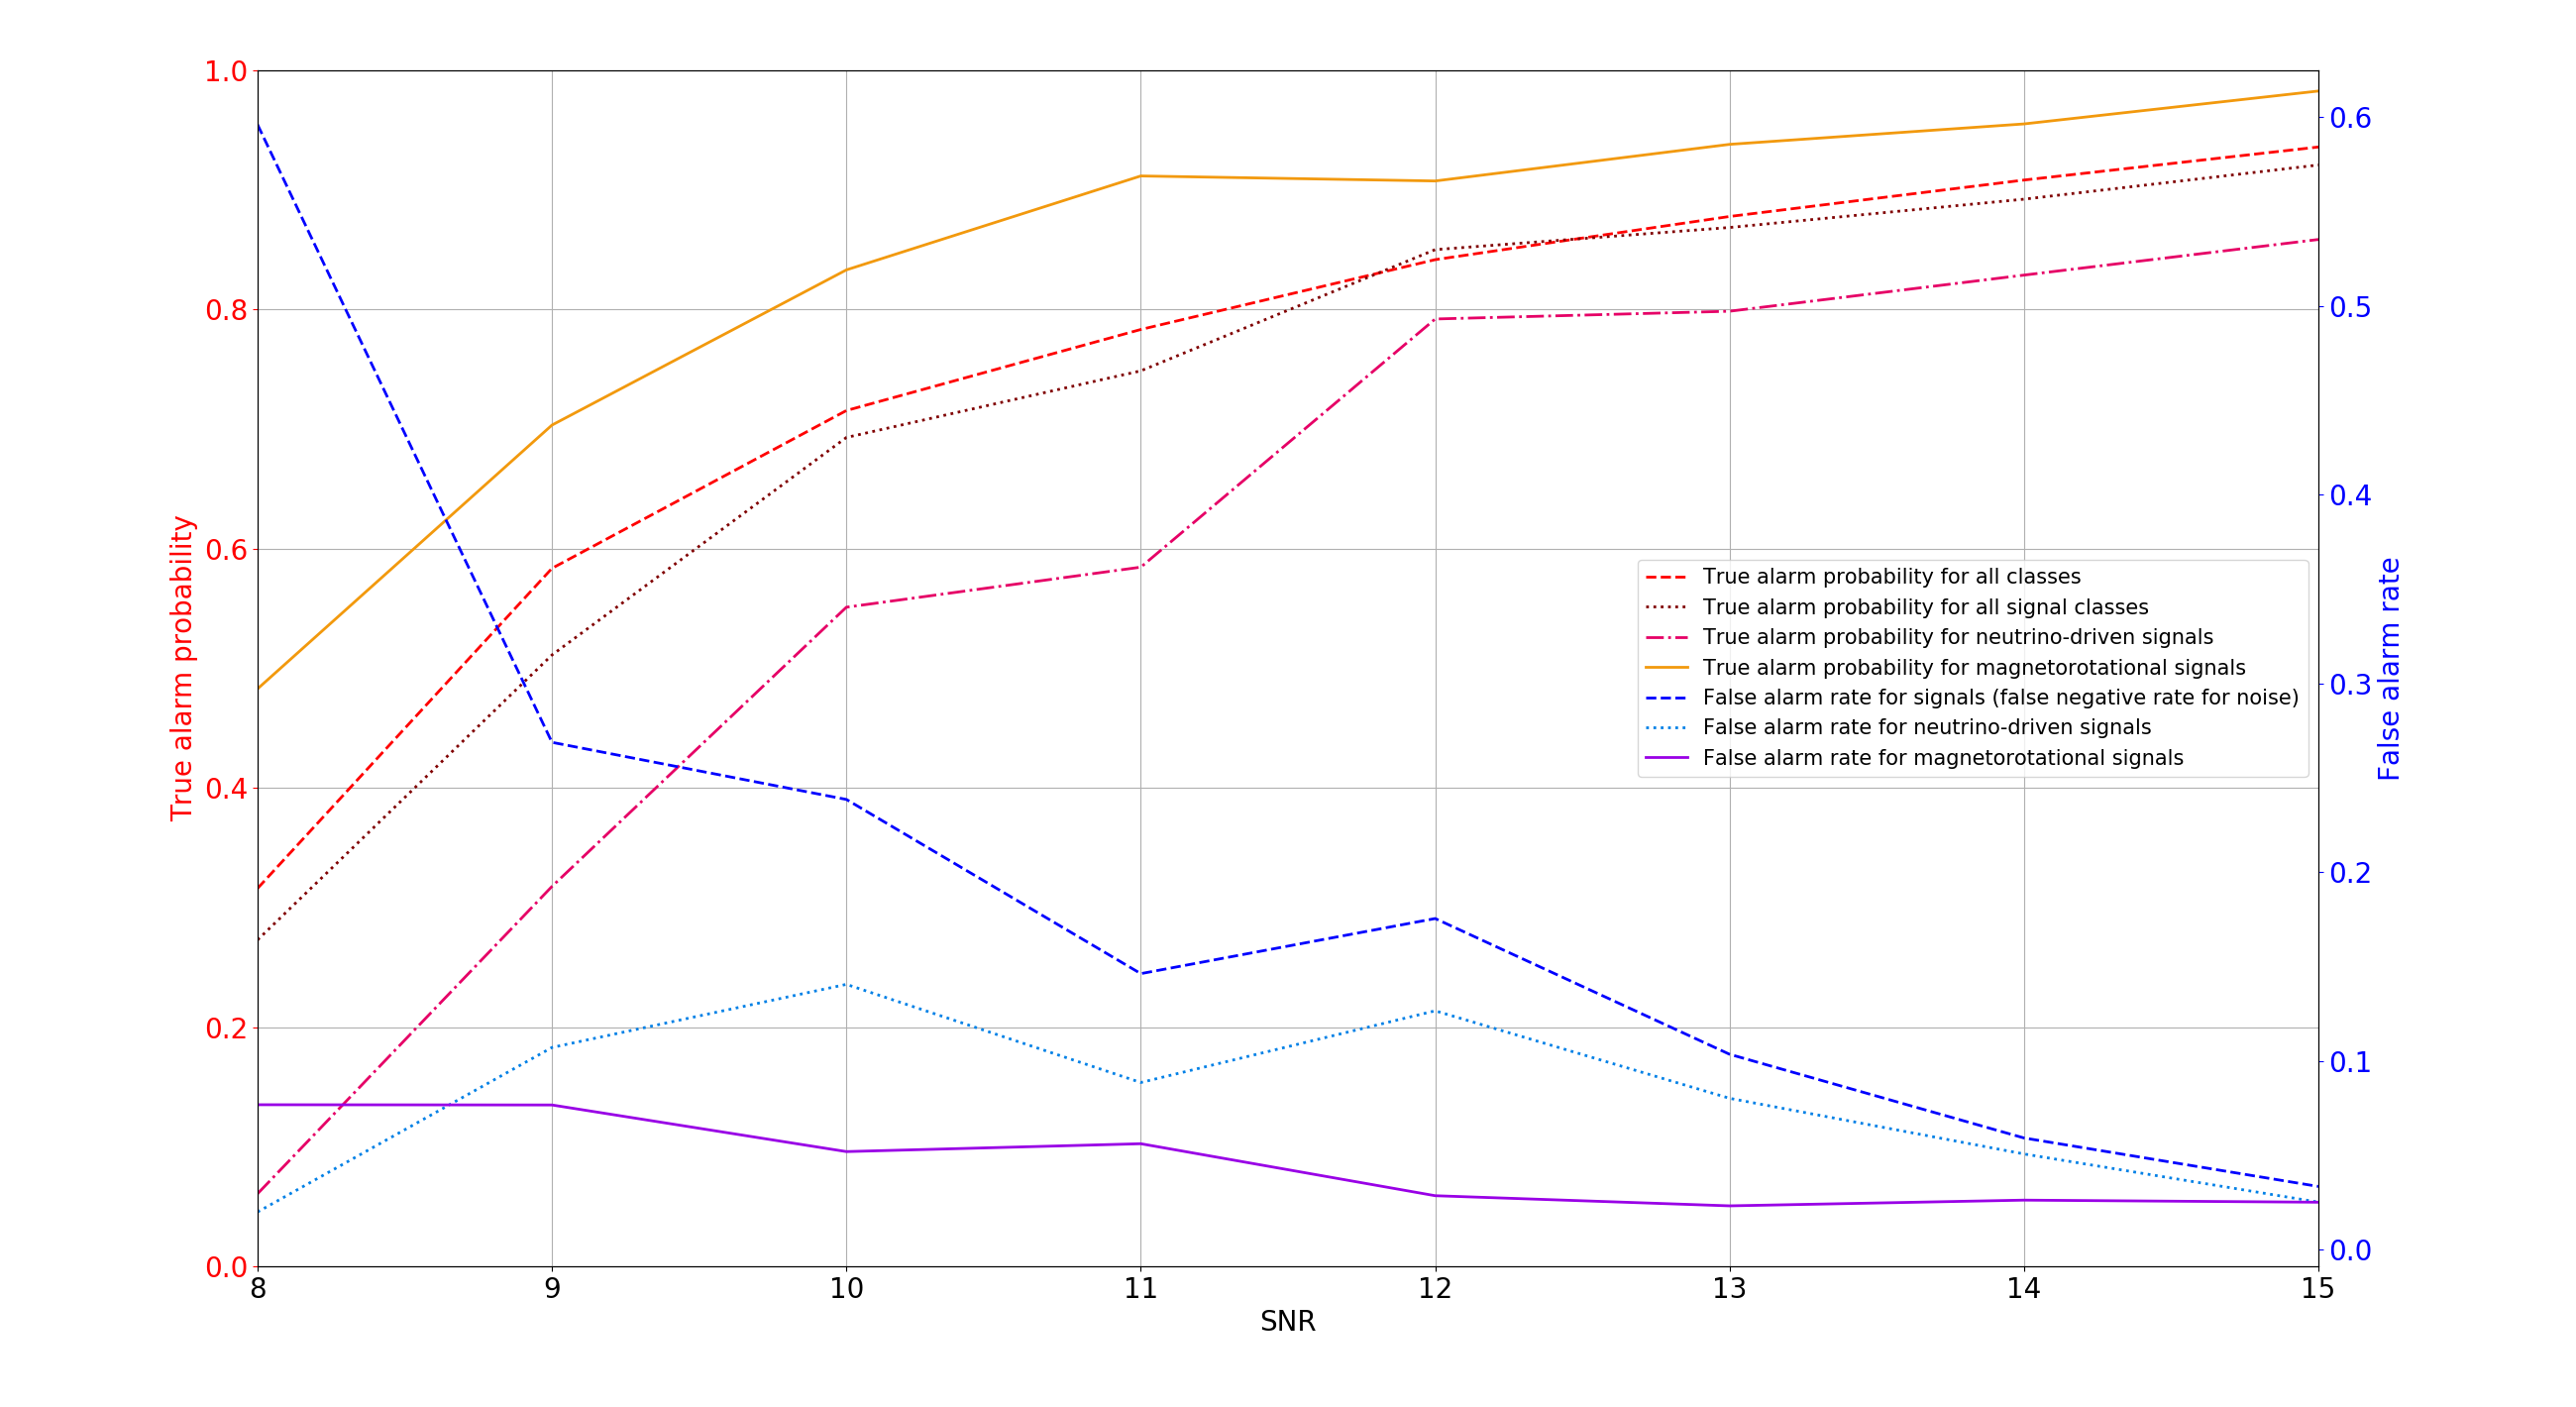

In [2]:
image = Image.open('ROC_with_fixed_threshold_fixed_threshold-1.png')
image

## Figure 2. Efficiency curves for SNR from 8 to 15.
### Since there are now three classes of data, the efficiency curves should be viewed as one class versus the rests.
### i.e.: solid lines are for class "Neutrino-driven" verse classes "background or Magneto-rotational", while
### dashed lines are for class "Magneto-rotational" verse classes "background or Neutrino-drive".

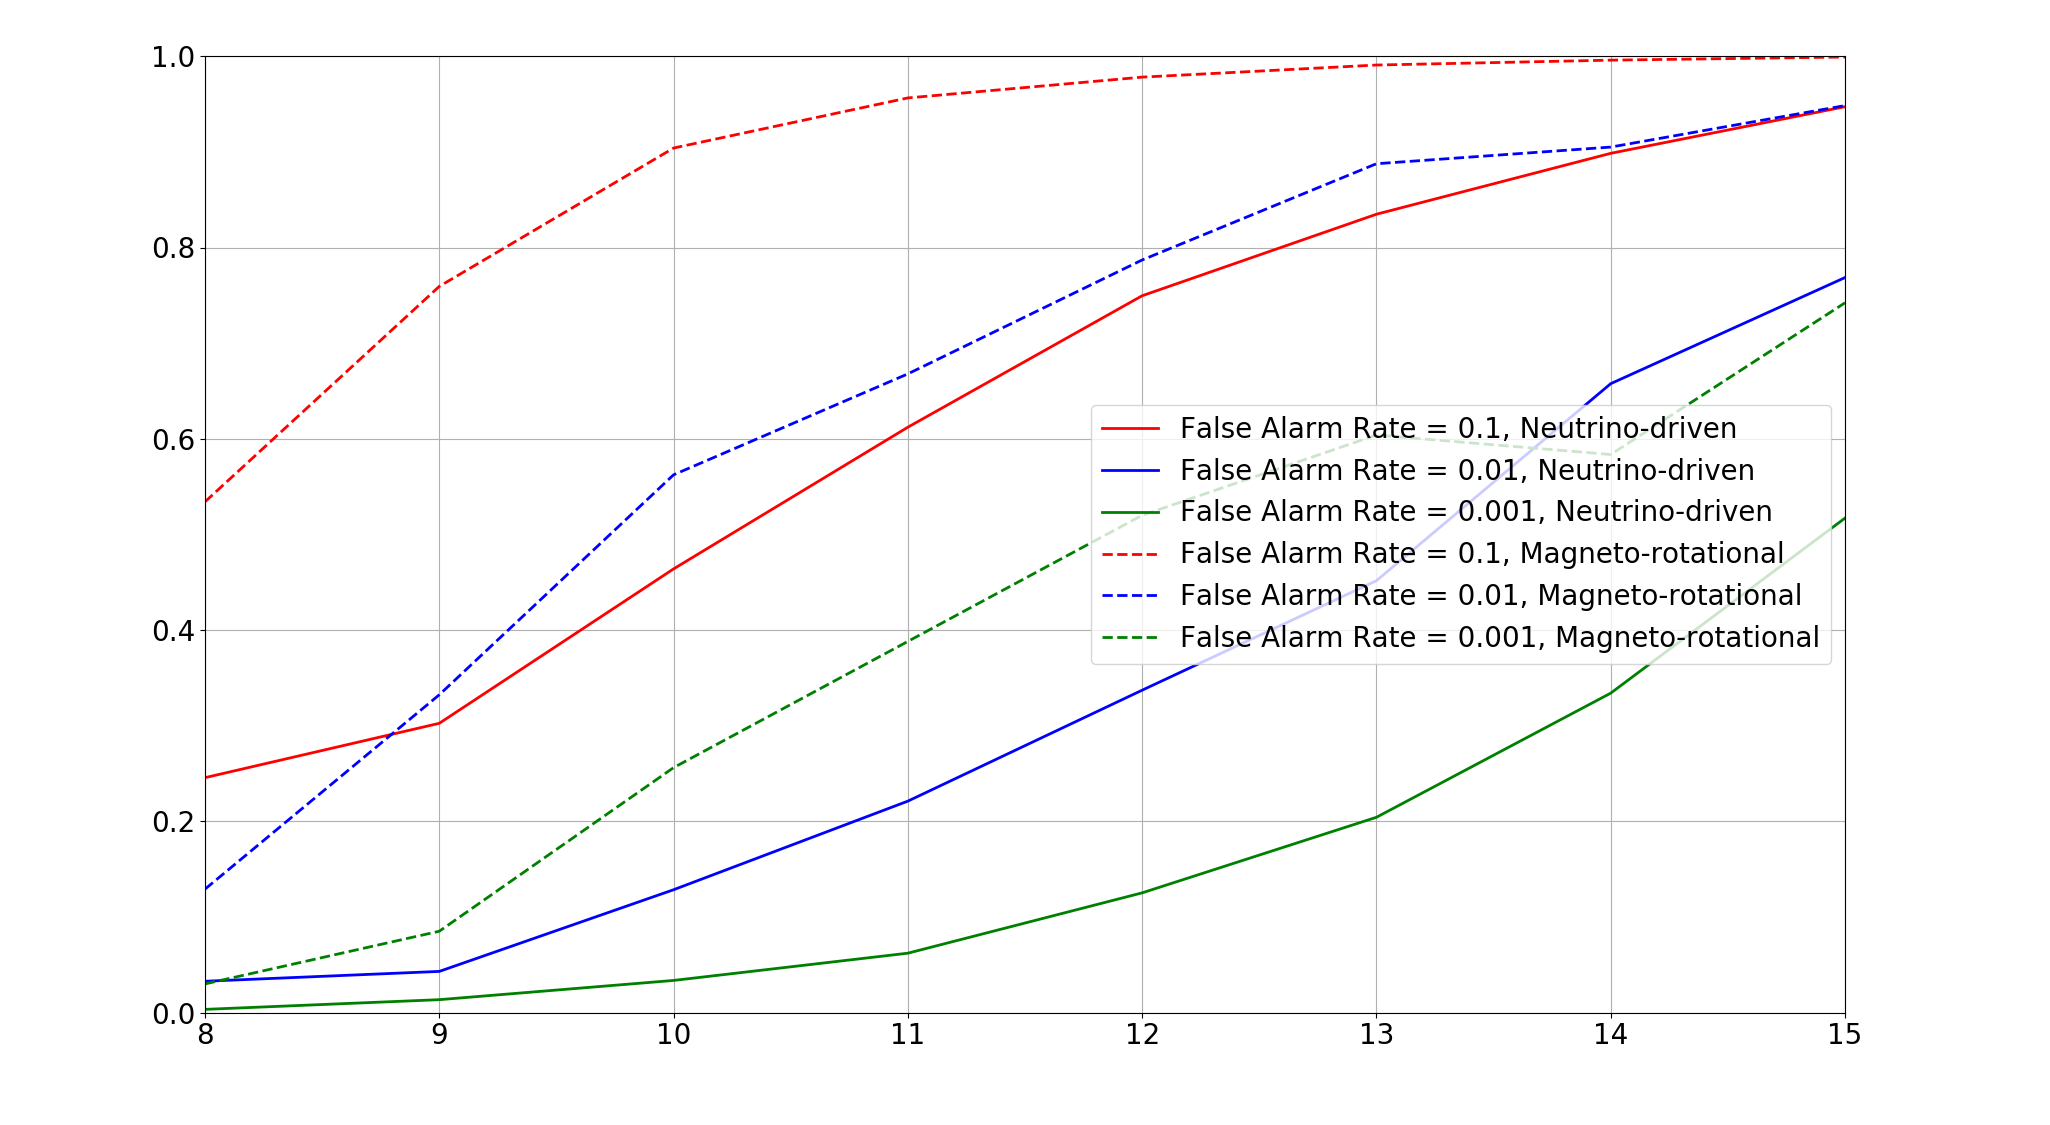

In [2]:
image = Image.open('efficiency_curves_for_fixed_threshold-1.png')
image

### Figure 3. ROC curves for SNR from 8 to 15, log-scale.
### Again, since there are three classes, each of the curves should be viewed as one class versus the others.
### Again, solid lines are for class "Neutrino-driven" verse classes "background or Magneto-rotational" and
### dashed lines are for class "Magneto-rotational" verse classes "background or Neutrino-drive".

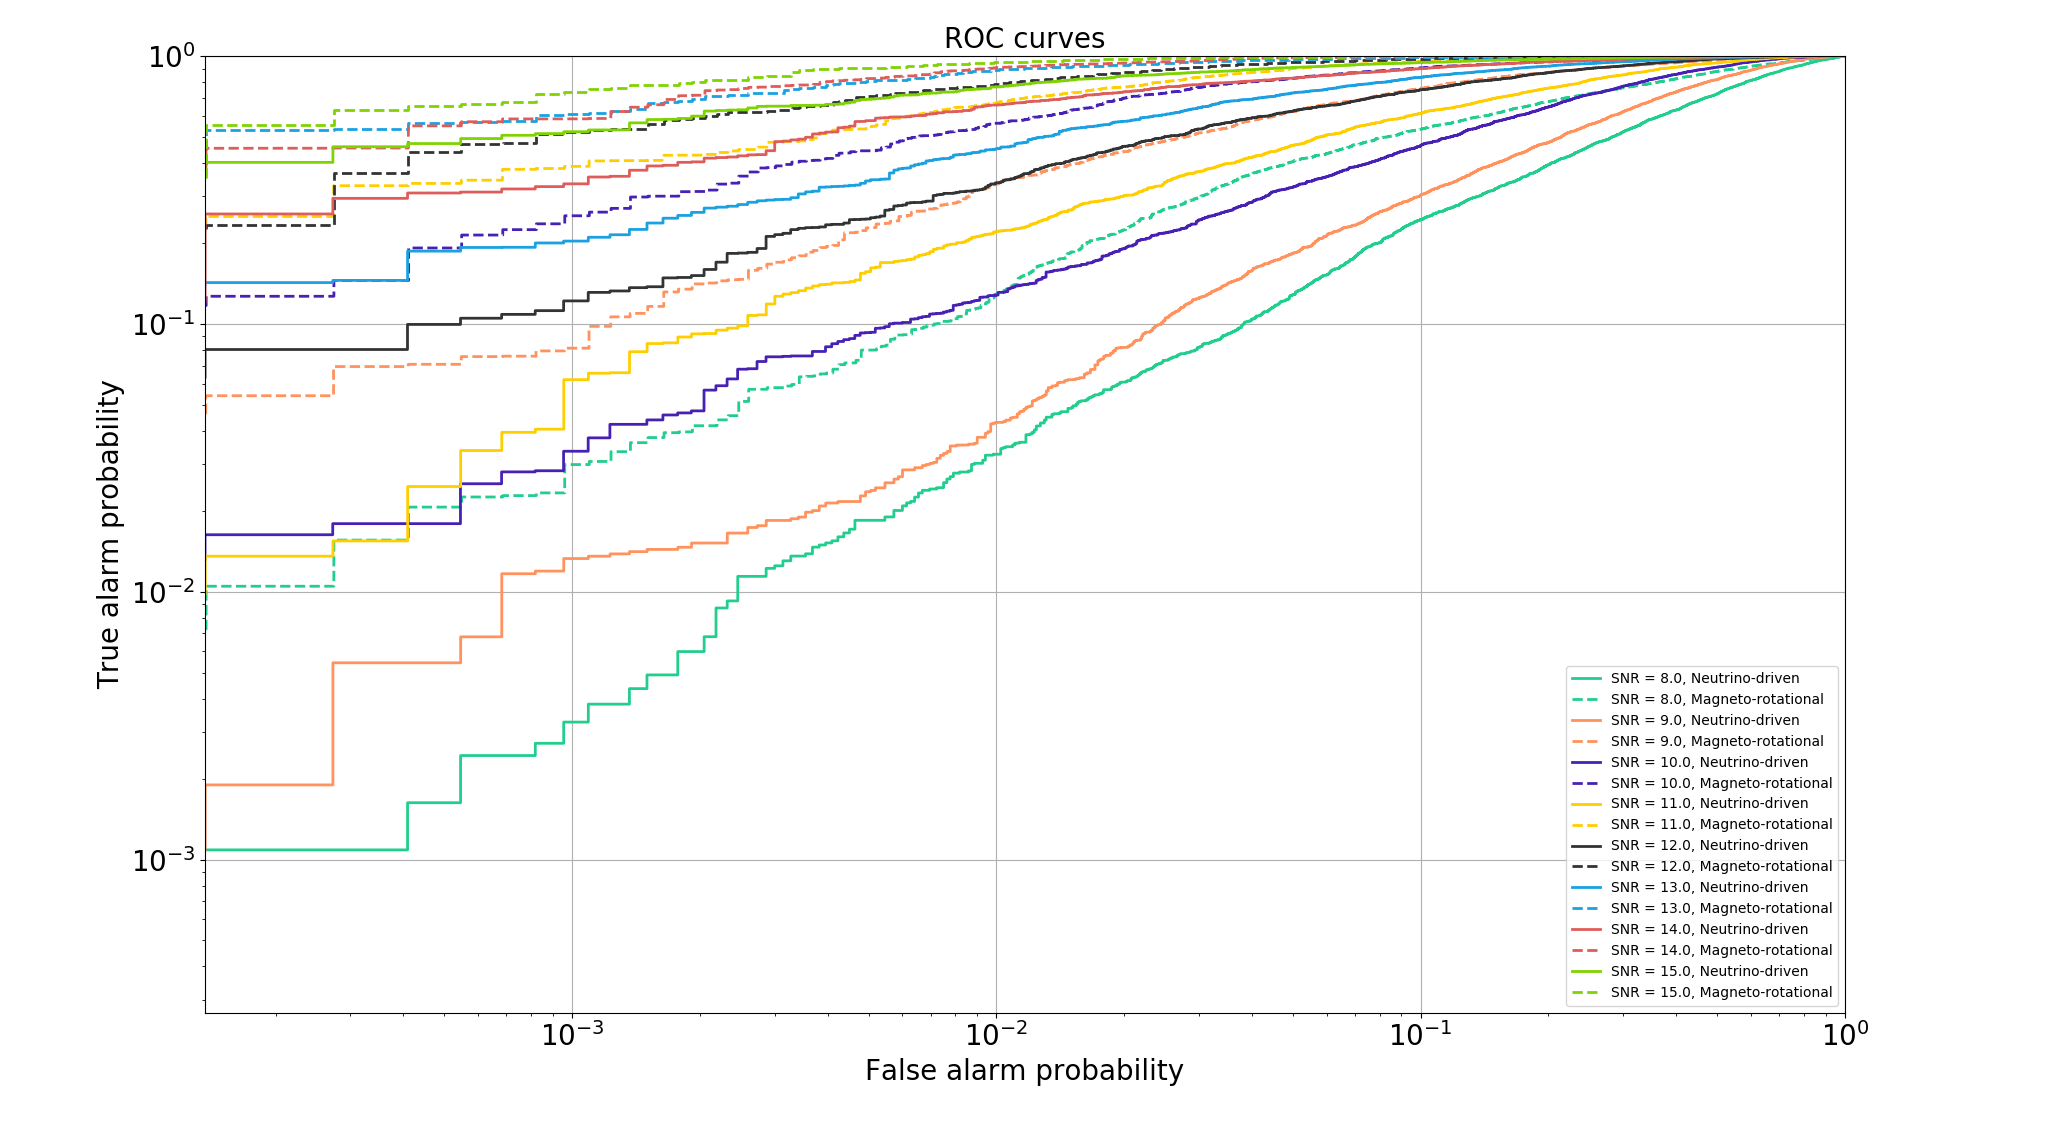

In [5]:
image = Image.open('ROC_curves_log_scale_for_TN_fixed_threshold-1.png')
image

## Figure 4. ROC curves for SNR from 8 to 15, log-scale.


In [6]:
image = Image.open('ROC_curves_for_TN_fixed_threshold-1.png')
image

## Figure 6. Confusion matrix for SNR = 8

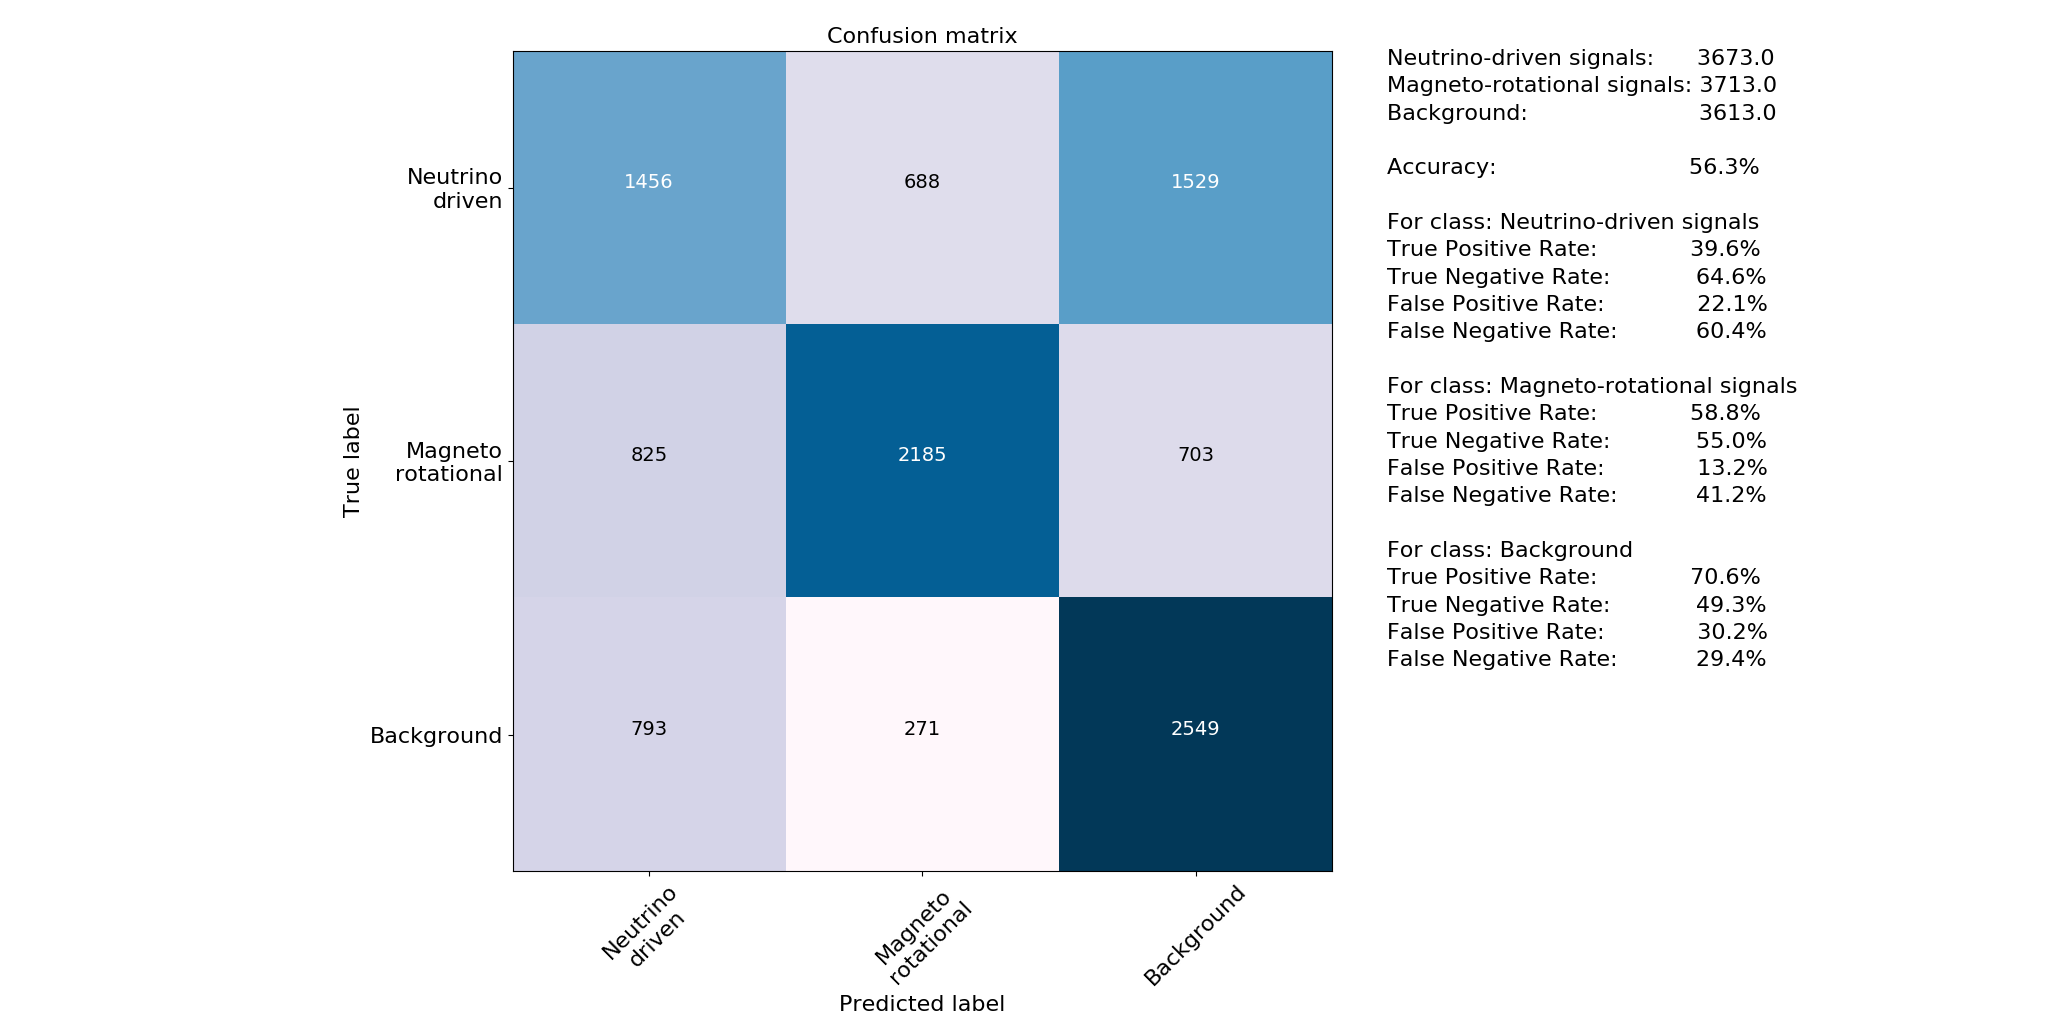

In [7]:
image = Image.open('Confusion_matrix_for_SNR_8.0_fixed_threshold-1.png')
image

## Figure 7. Confusion matrix for SNR = 9

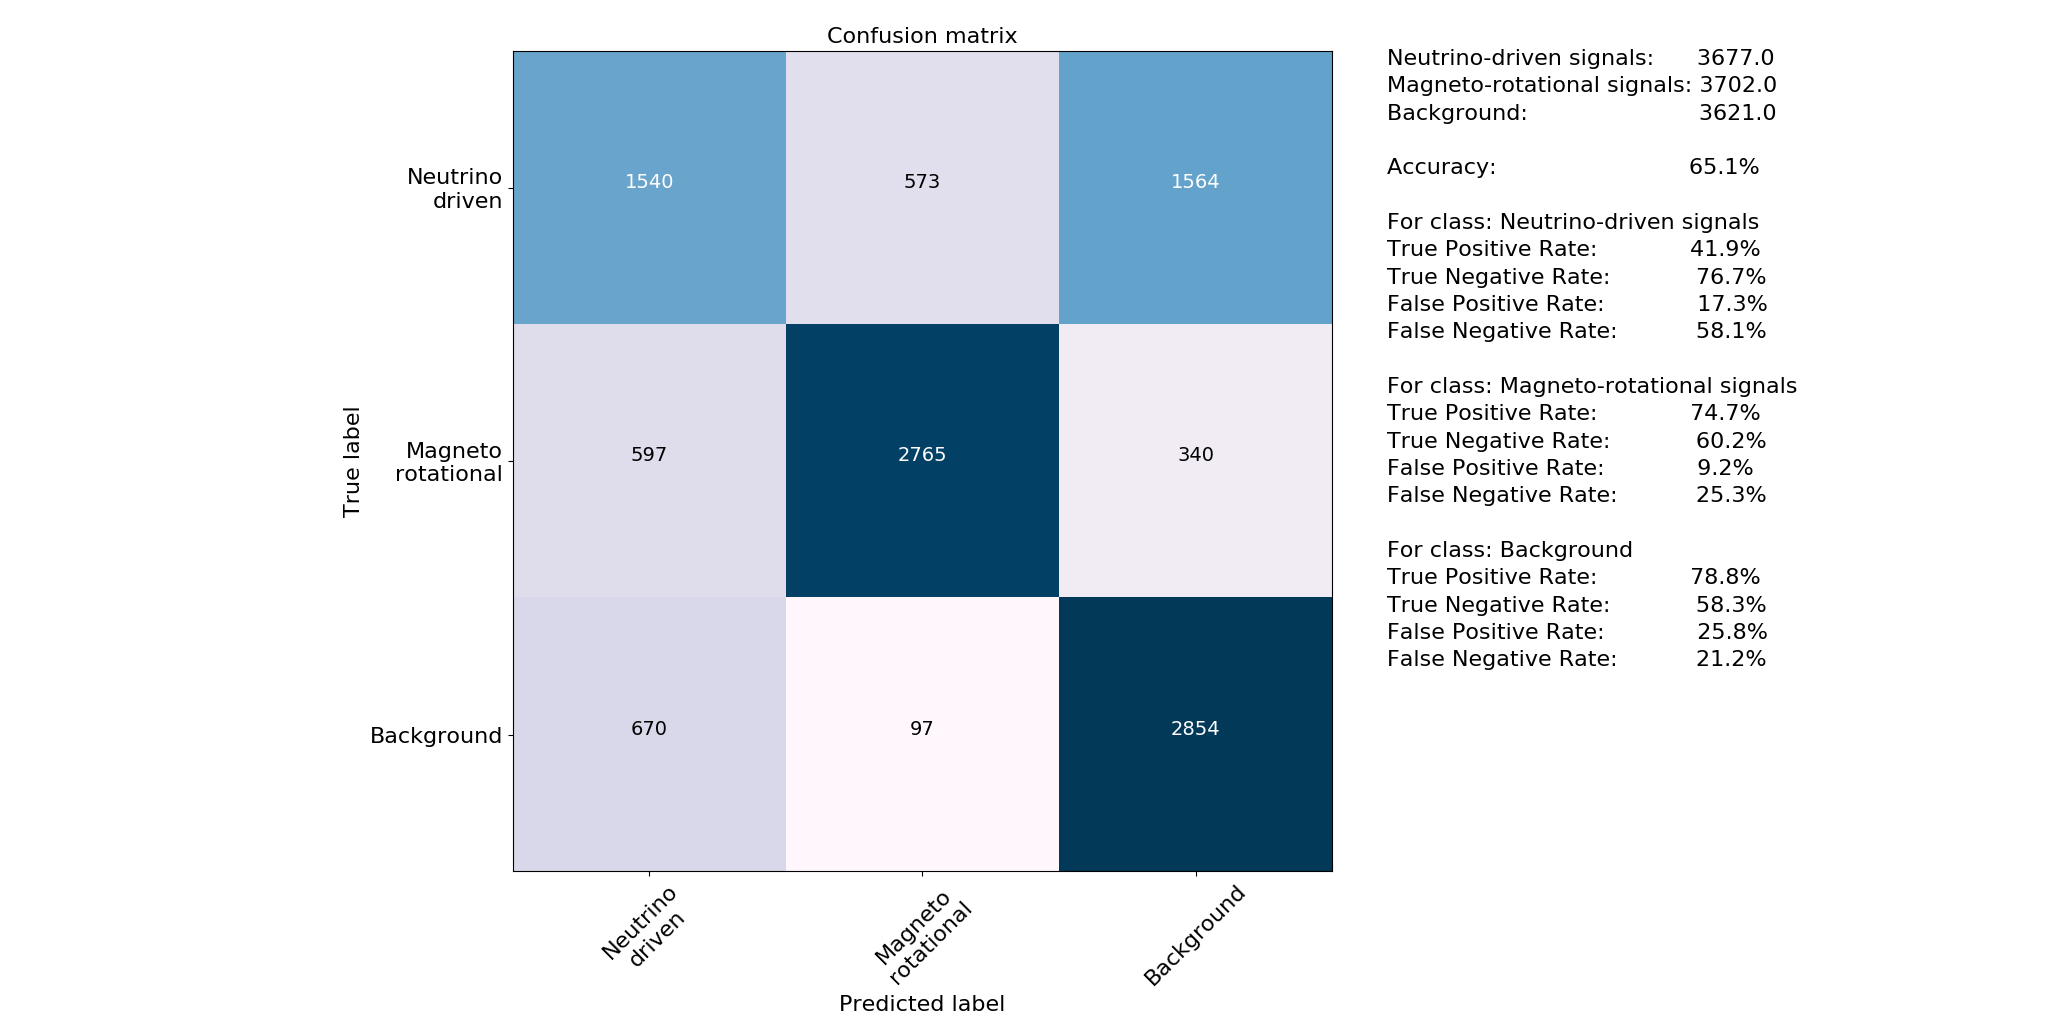

In [8]:
image = Image.open('Confusion_matrix_for_SNR_9.0_fixed_threshold-1.png')
image

## Figure 8. Confusion matrix for SNR = 10

In [9]:
image = Image.open('Confusion_matrix_for_SNR_10.0_fixed_threshold-1.png')
image

## Figure 9. Confusion matrix for SNR = 11

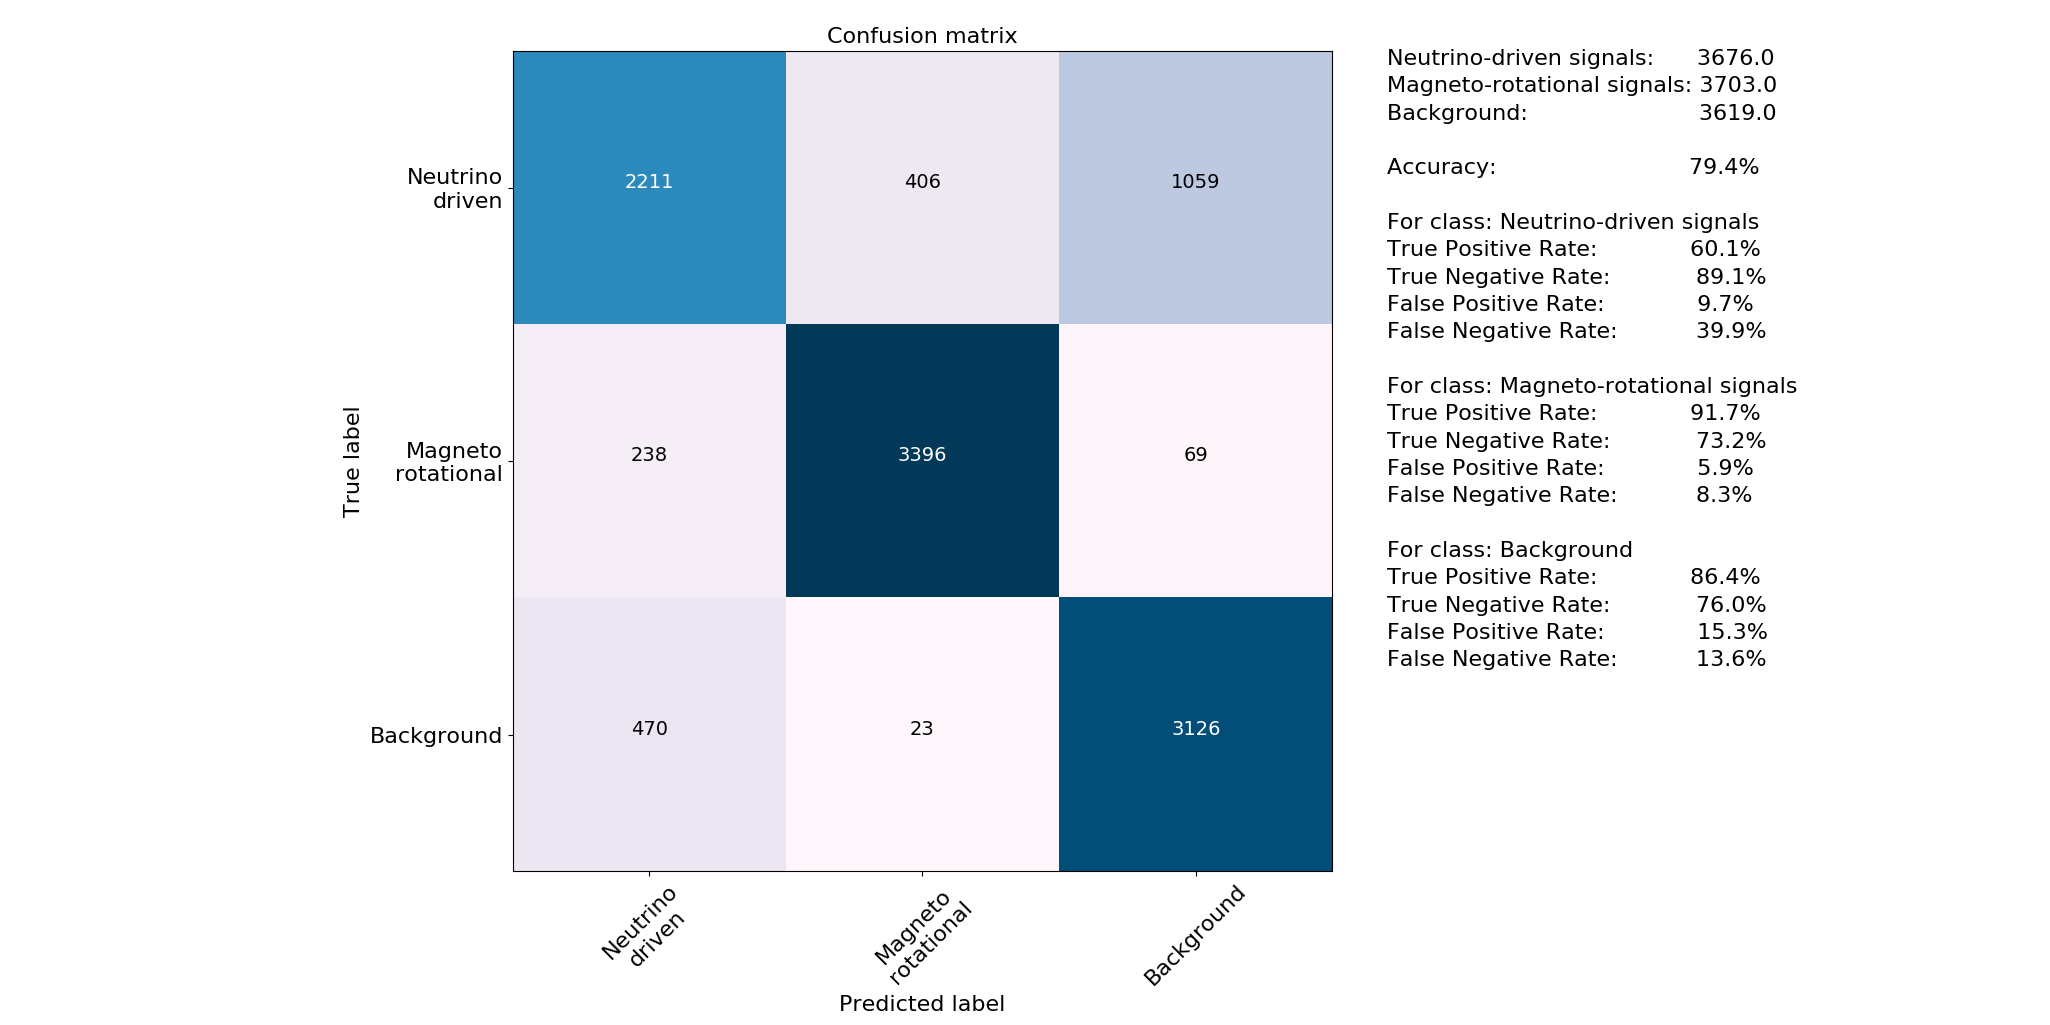

In [10]:
image = Image.open('Confusion_matrix_for_SNR_11.0_fixed_threshold-1.png')
image

## Figure 10. Confusion matrix for SNR = 12

In [ ]:
image = Image.open('Confusion_matrix_for_SNR_12.0_fixed_threshold-1.png')
image

## Figure 11. Confusion matrix for SNR = 13

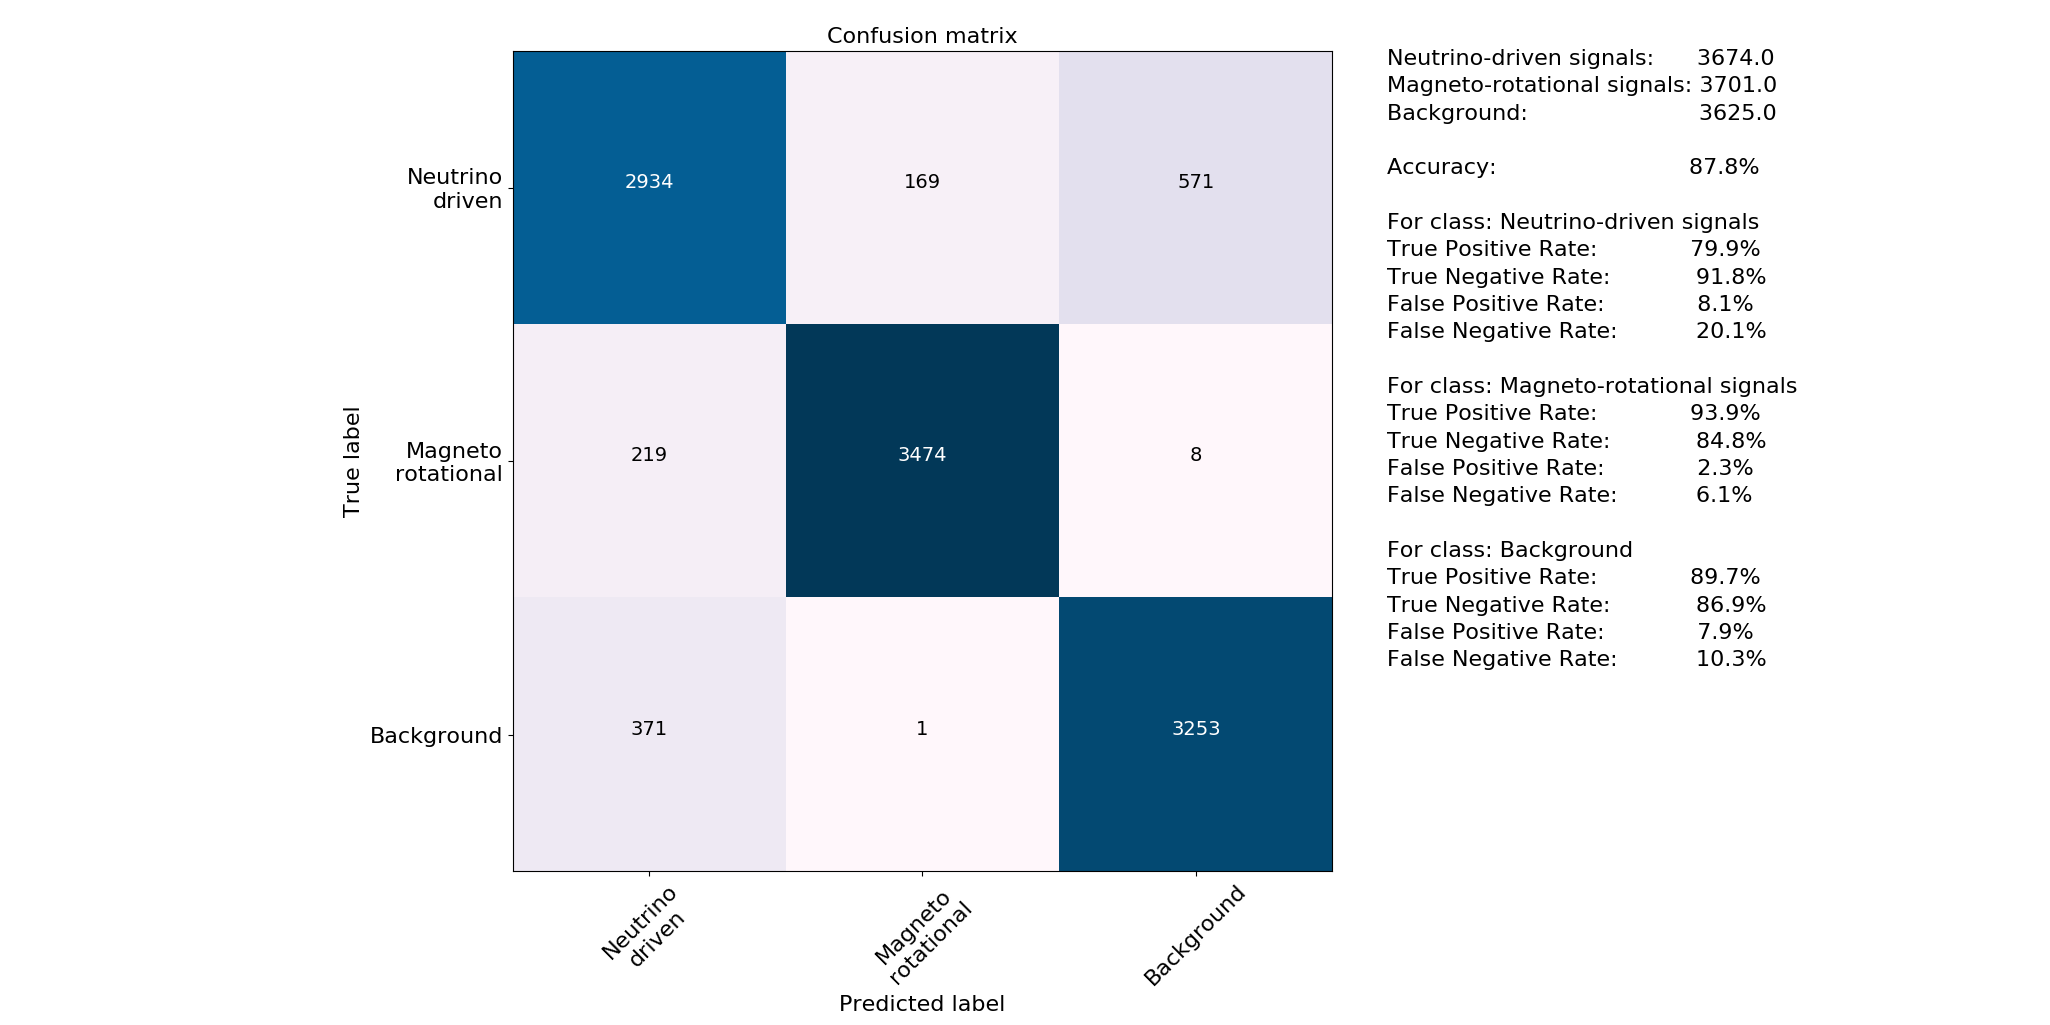

In [11]:
image = Image.open('Confusion_matrix_for_SNR_13.0_fixed_threshold-1.png')
image

## Figure 12. Confusion matrix for SNR = 14

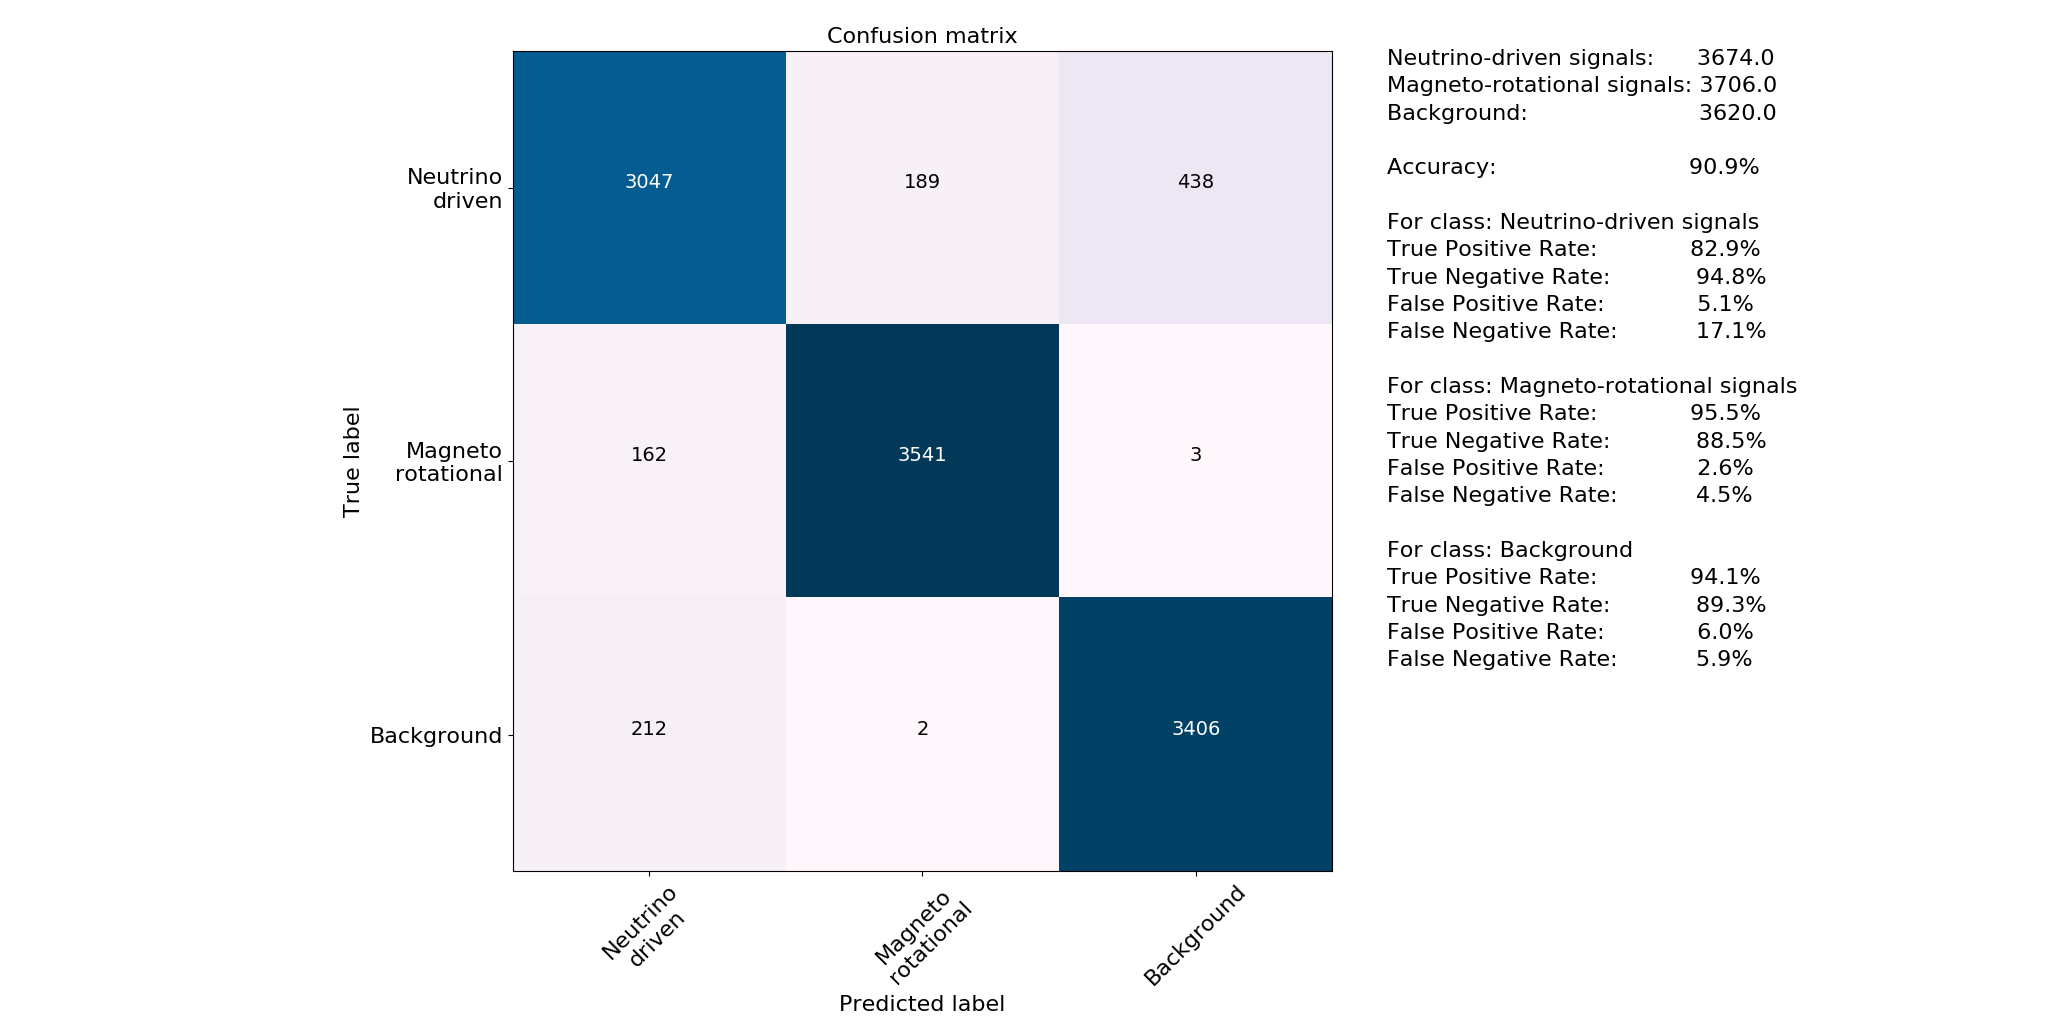

In [12]:
image = Image.open('Confusion_matrix_for_SNR_14.0_fixed_threshold-1.png')
image

## Figure 13. Confusion matrix for SNR = 15

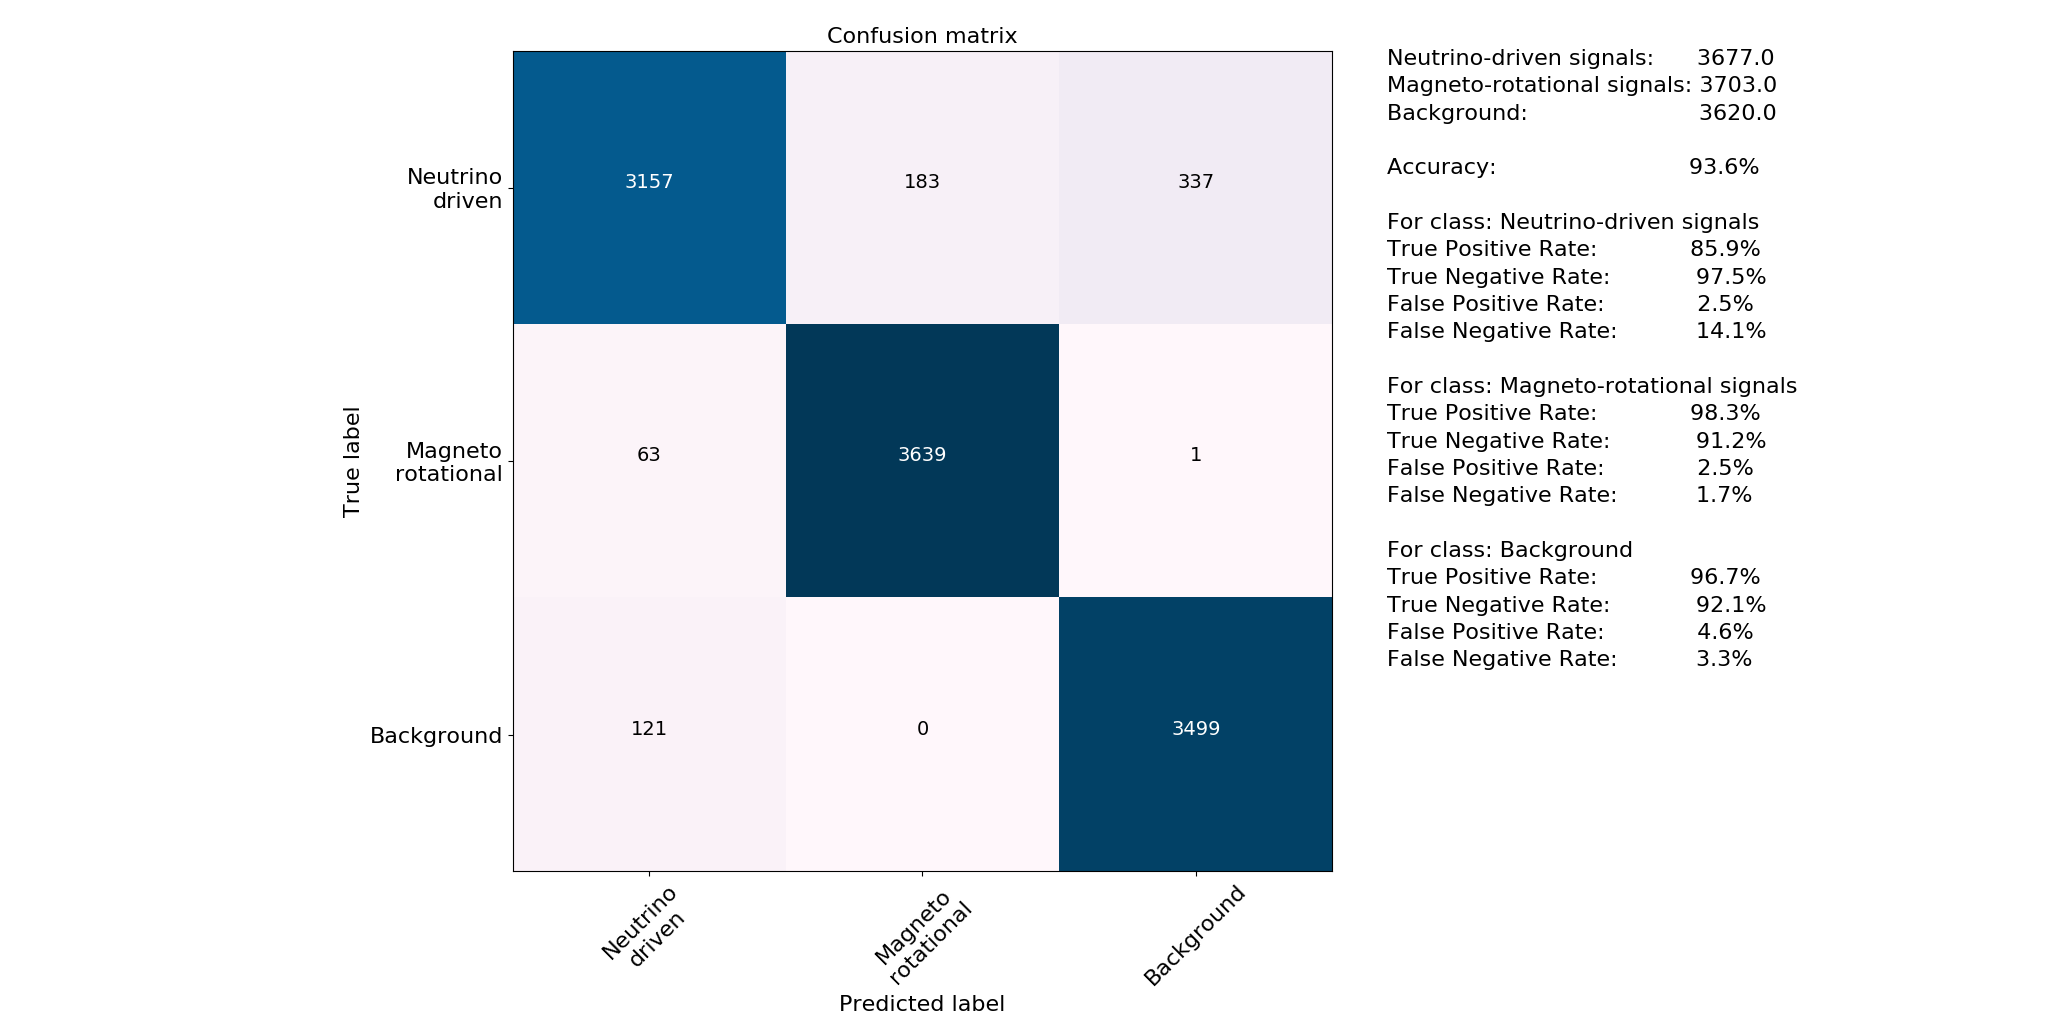

In [13]:
image = Image.open('Confusion_matrix_for_SNR_15.0_fixed_threshold-1.png')
image

# Figure 14. Loss plot for SNR = 8


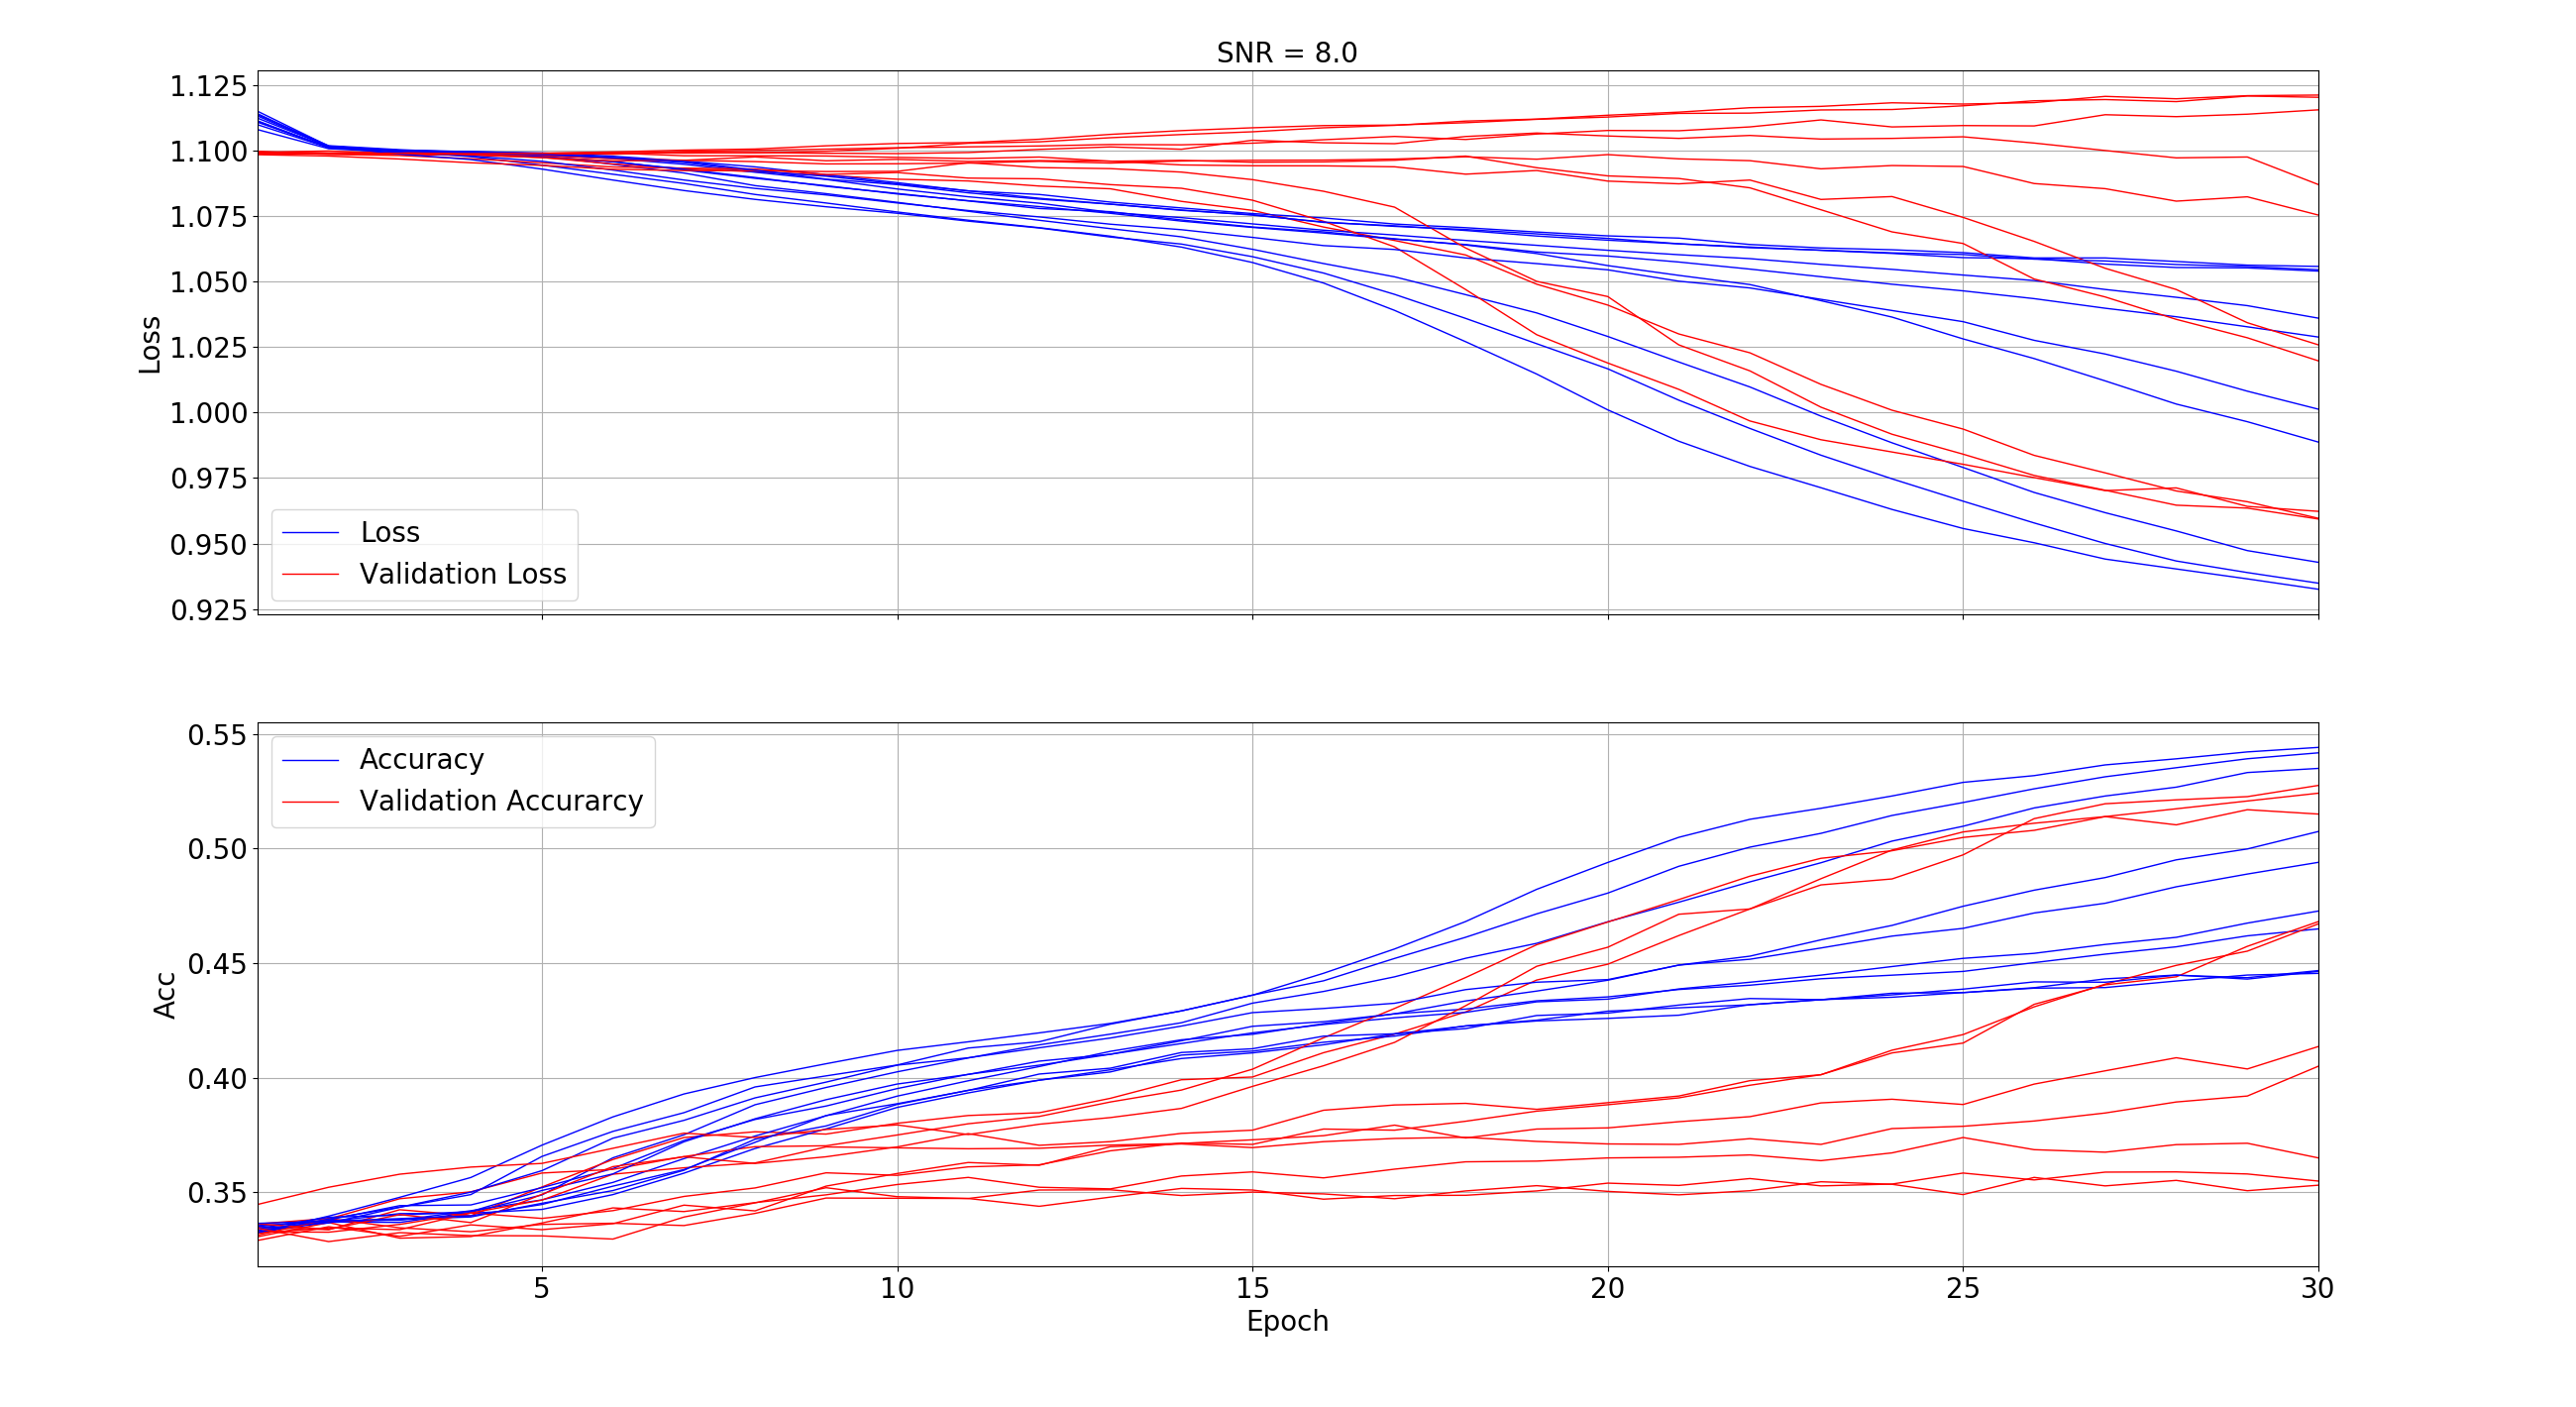

In [23]:
image = Image.open('Loss_plots_SNR_8.0_fixed_threshold-1.png')
image

# Figure 15. Loss plot for SNR = 9

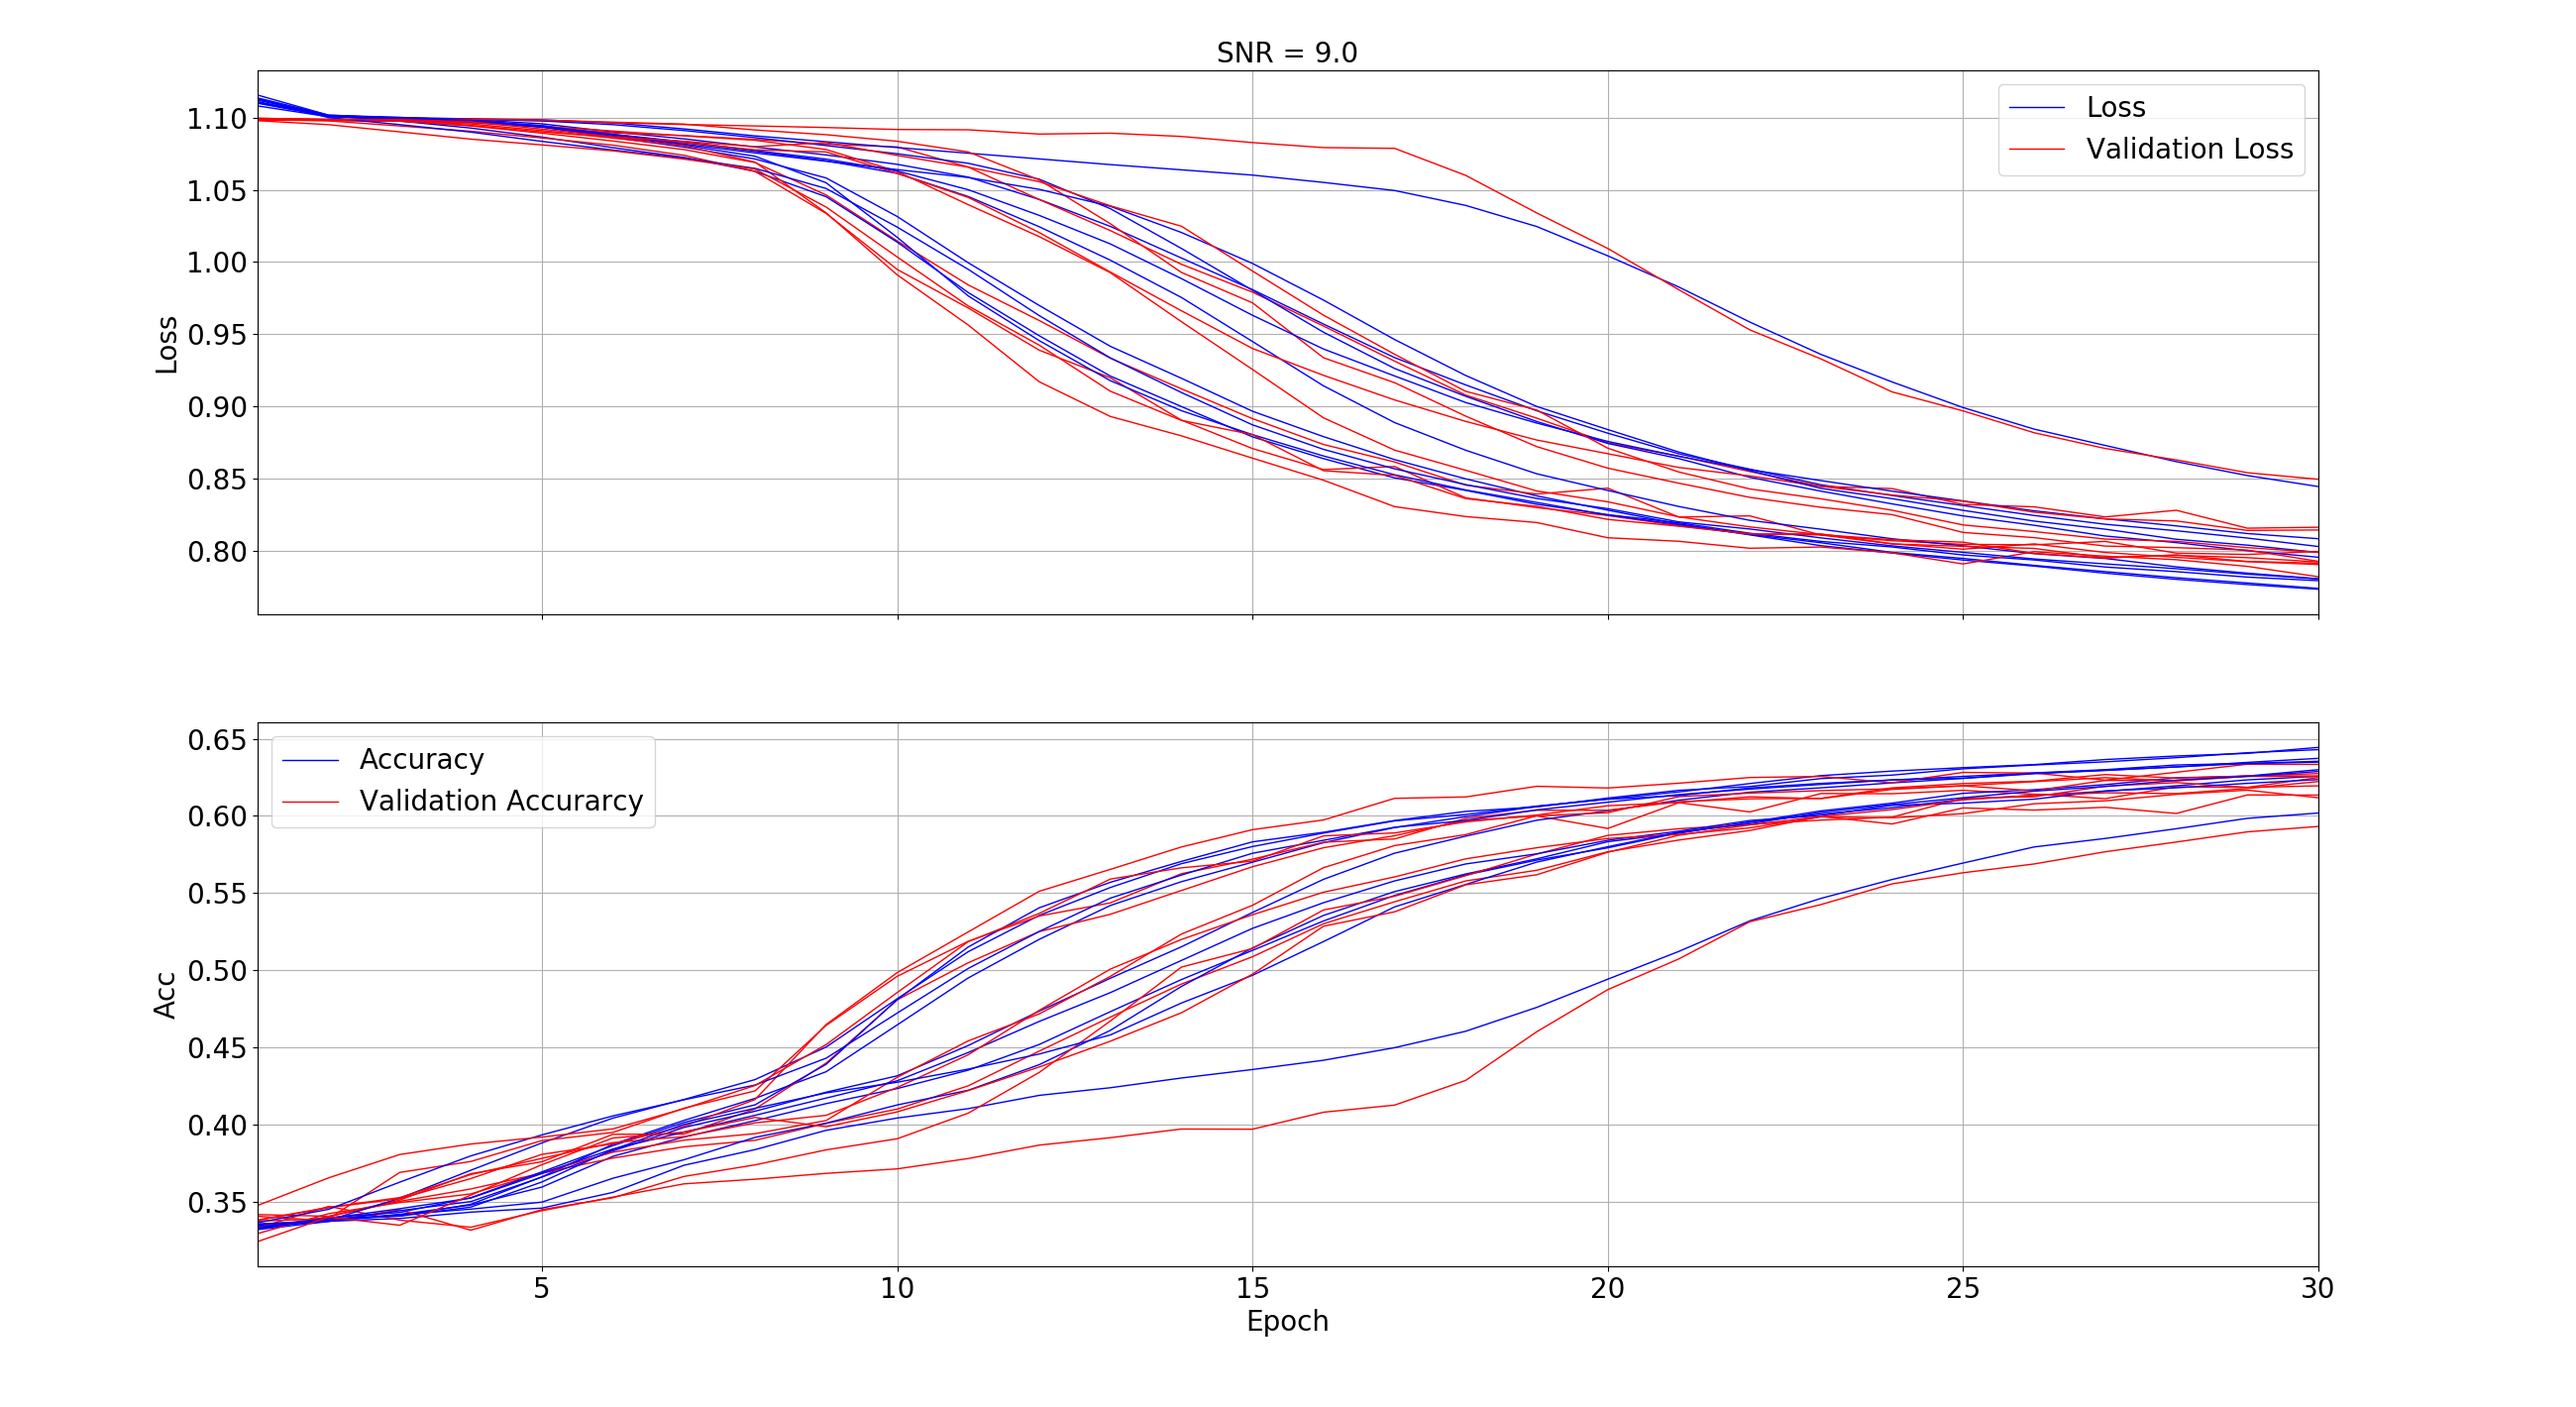

In [15]:
image = Image.open('Loss_plots_SNR_9.0_fixed_threshold-1.png')
image

# Figure 16. Loss plot for SNR = 10

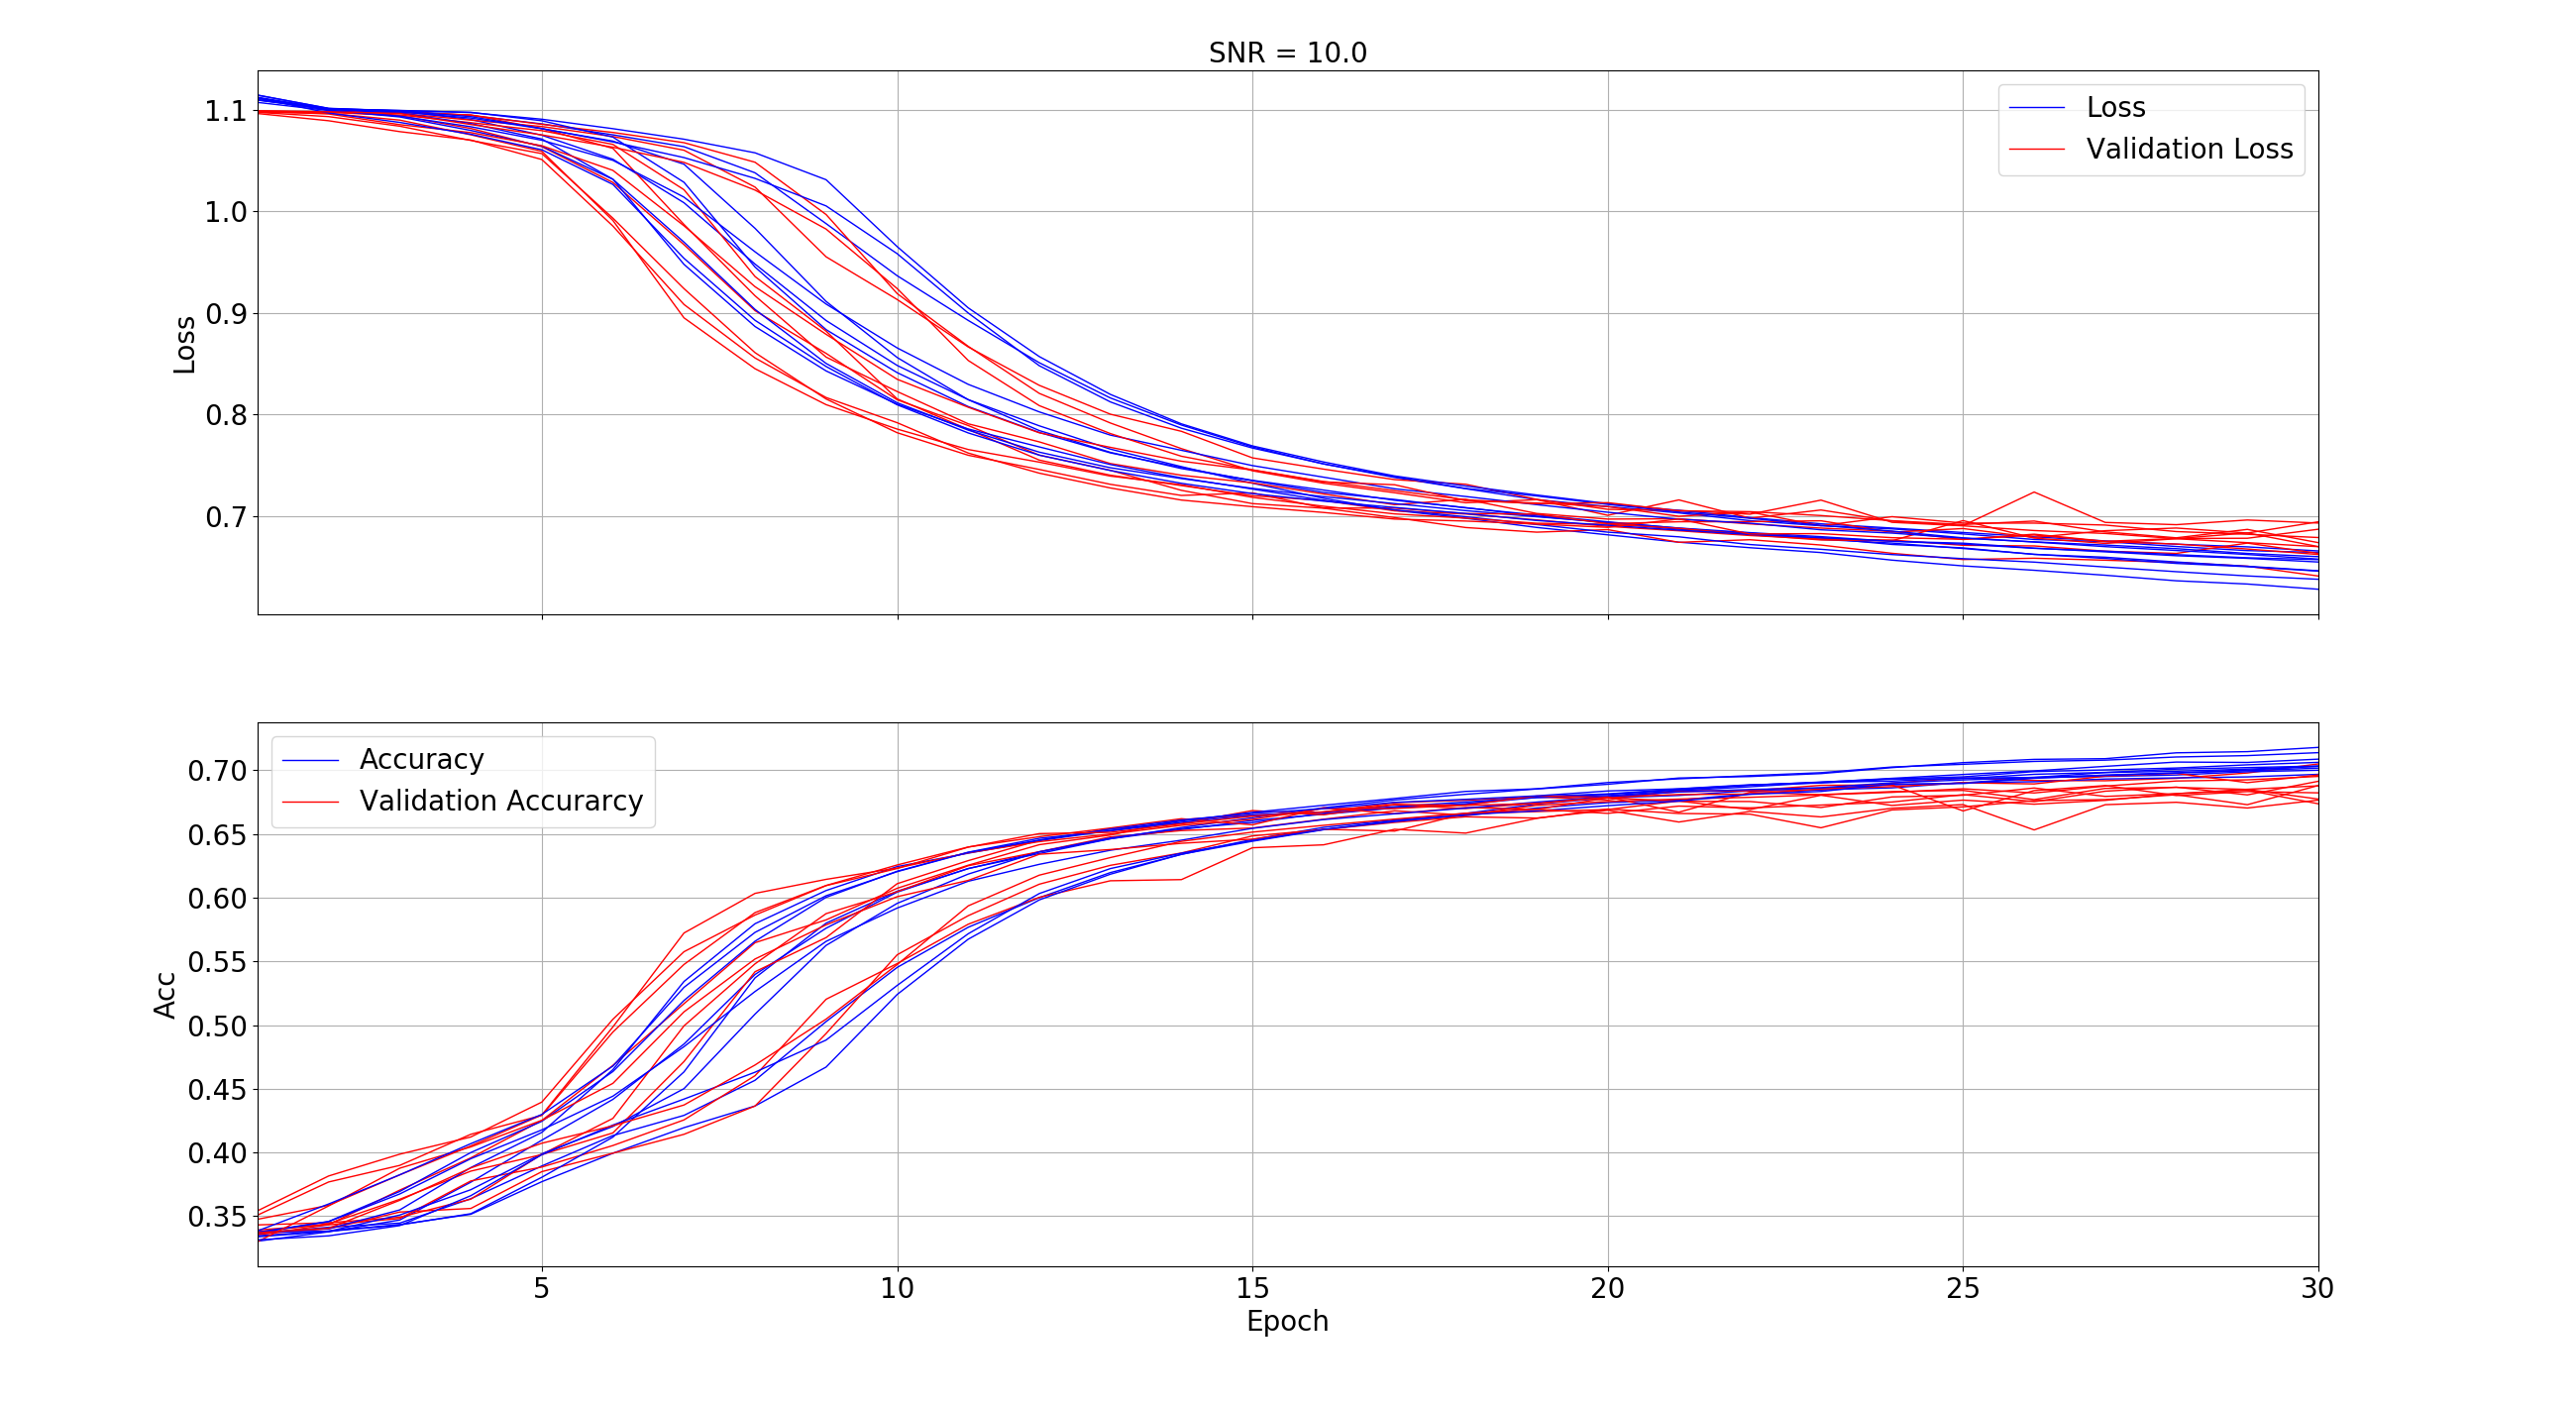

In [16]:
image = Image.open('Loss_plots_SNR_10.0_fixed_threshold-1.png')
image

# Figure 17. Loss plot for SNR = 11


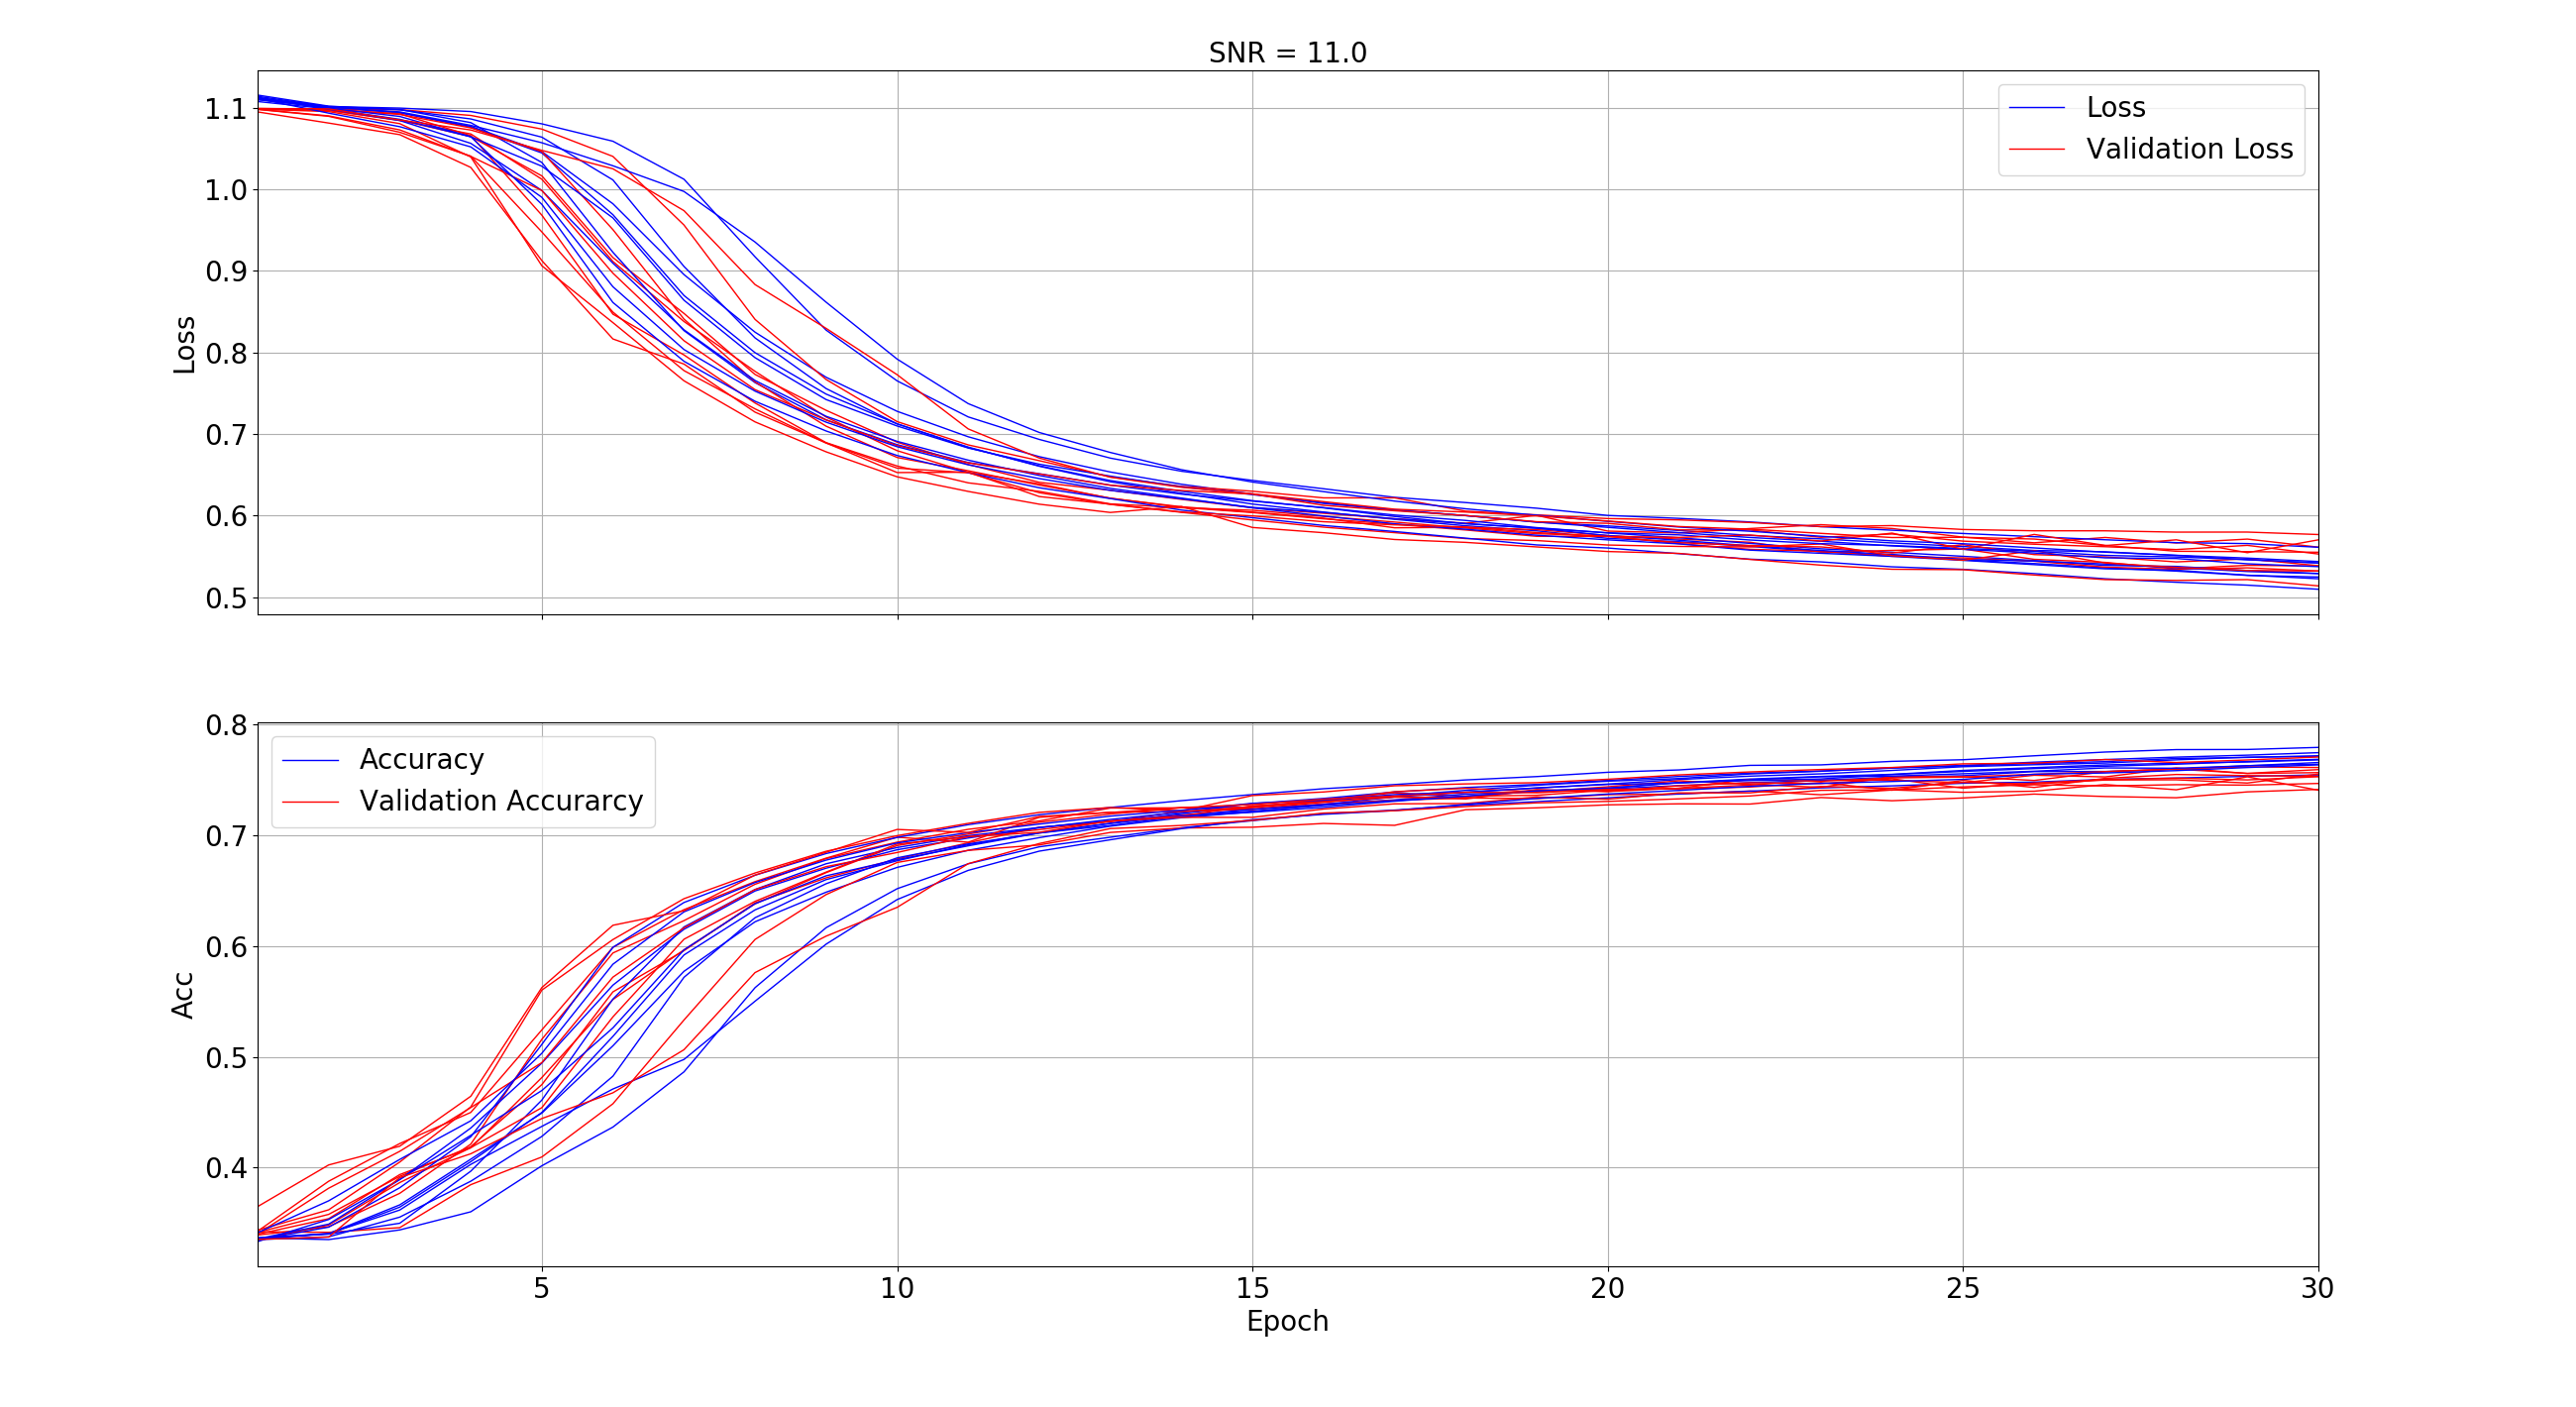

In [17]:
image = Image.open('Loss_plots_SNR_11.0_fixed_threshold-1.png')
image

# Figure 18. Loss plot for SNR = 12


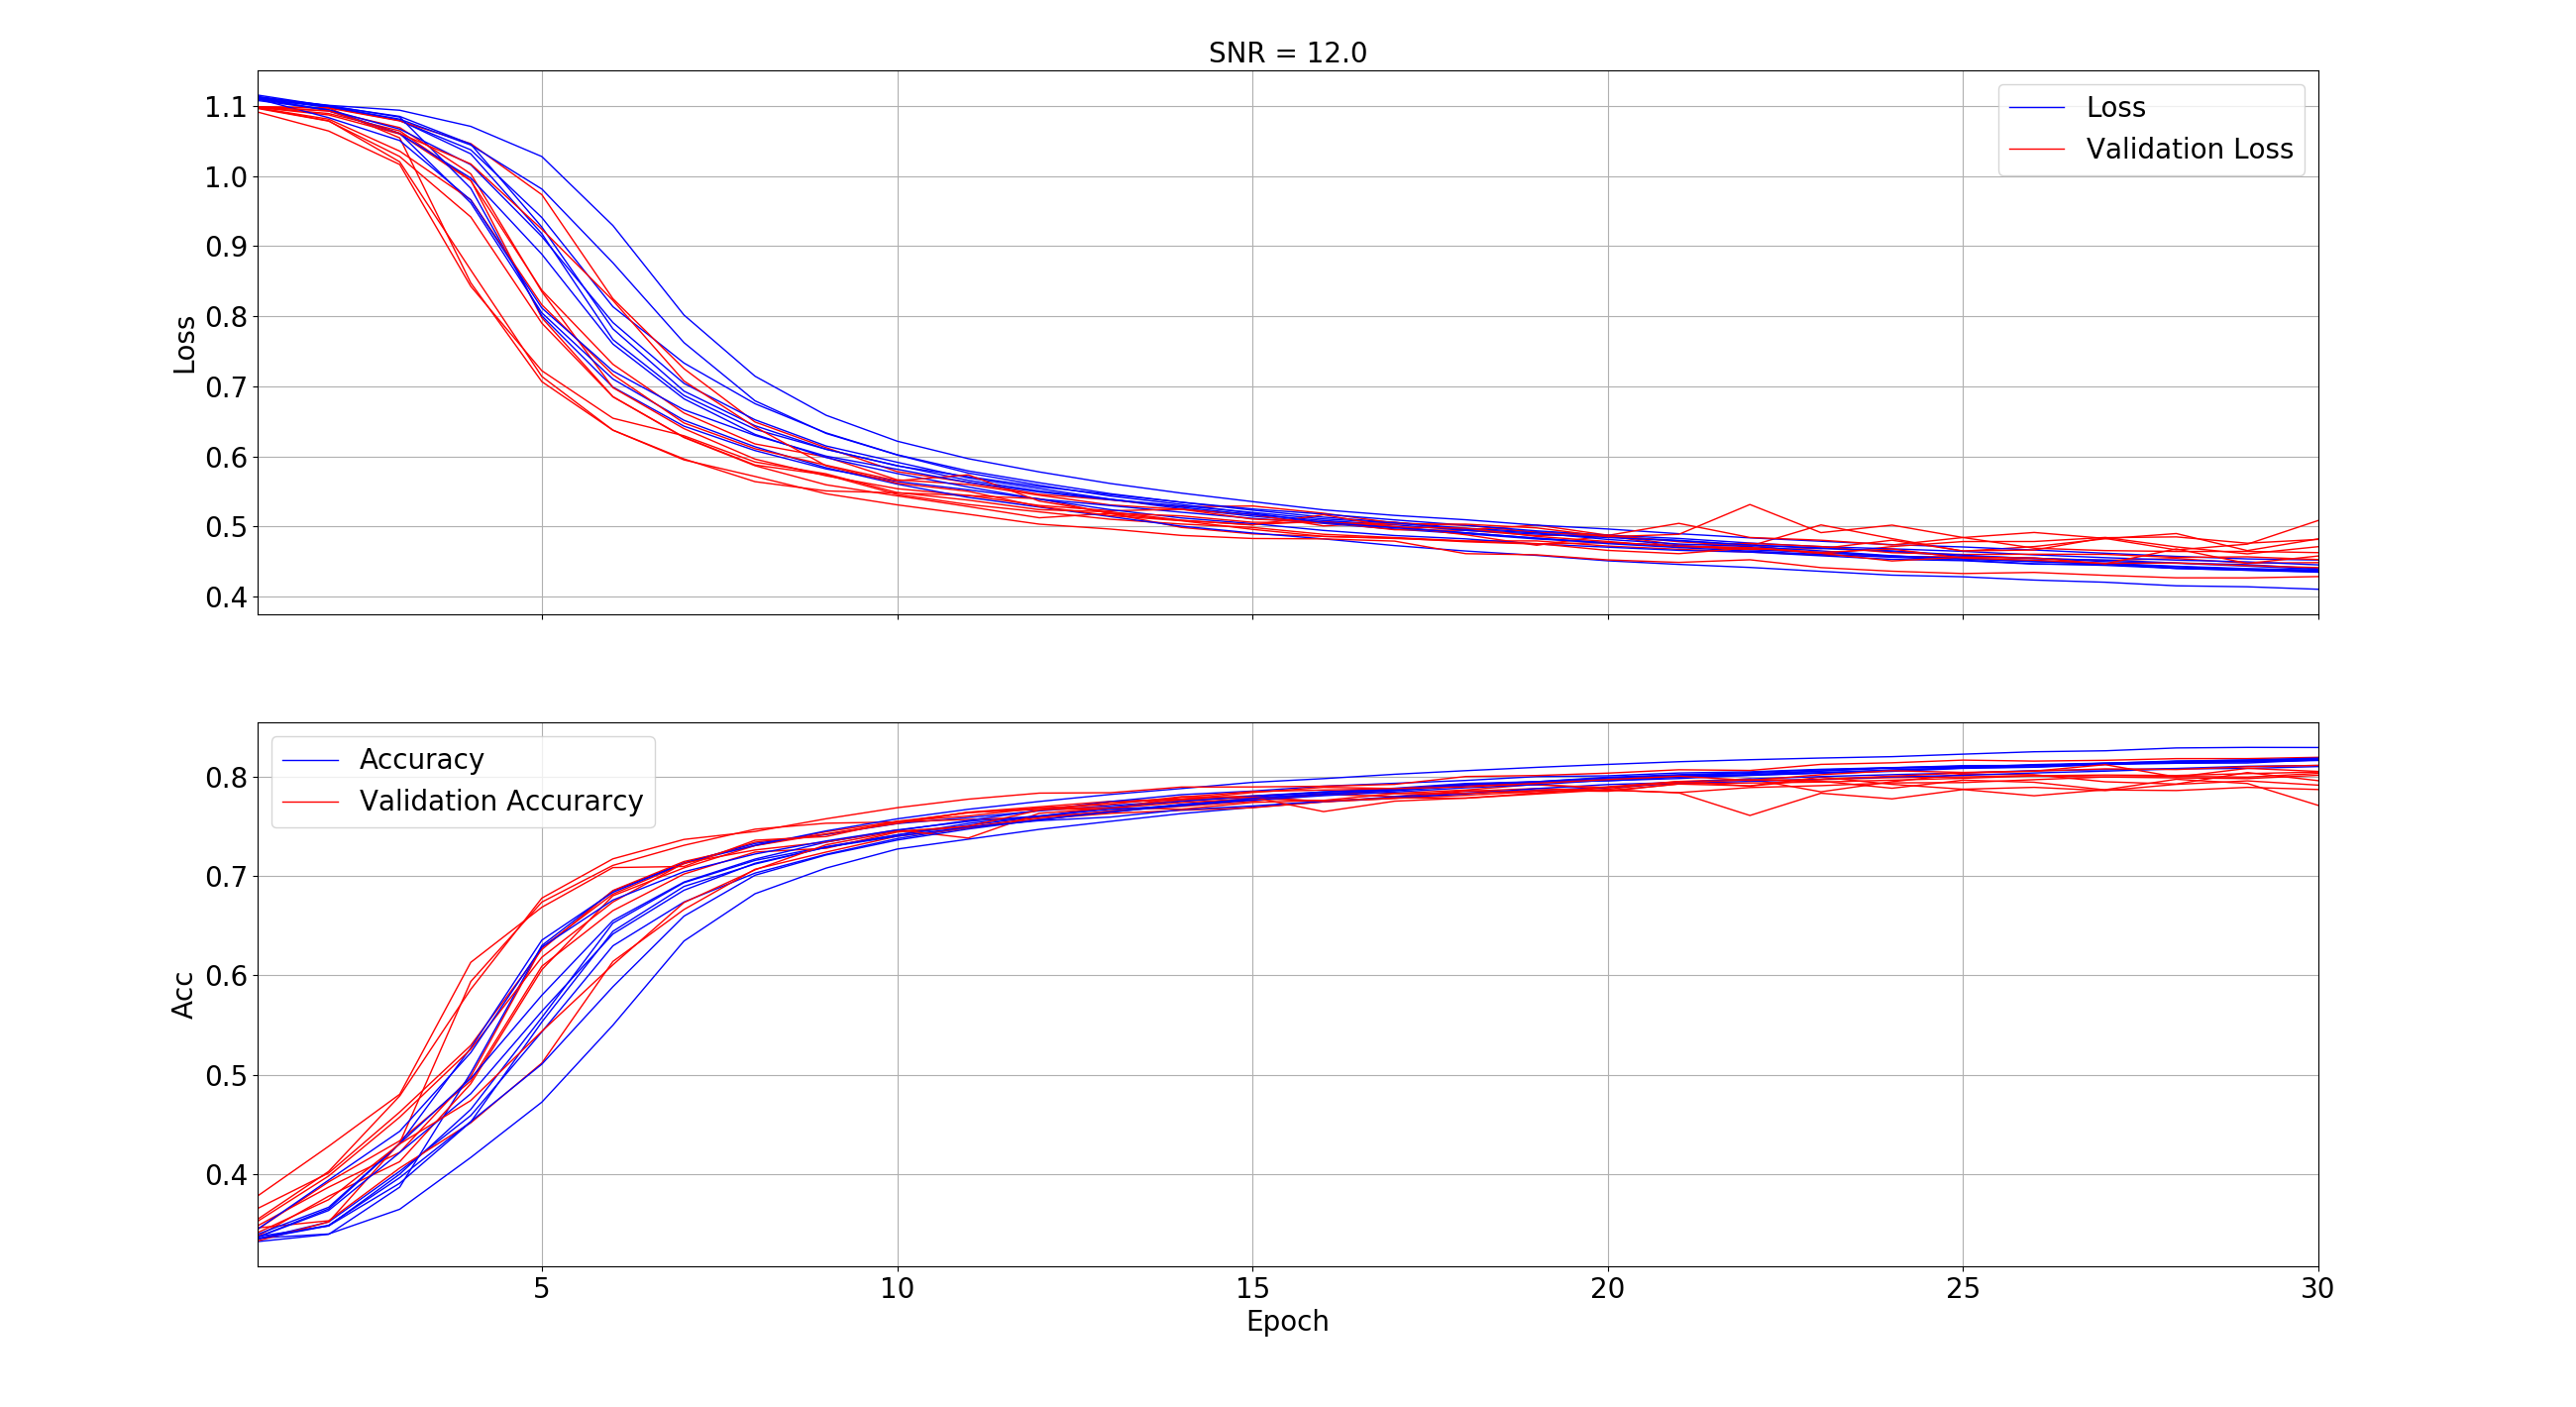

In [18]:
image = Image.open('Loss_plots_SNR_12.0_fixed_threshold-1.png')
image

# Figure 19. Loss plot for SNR = 13

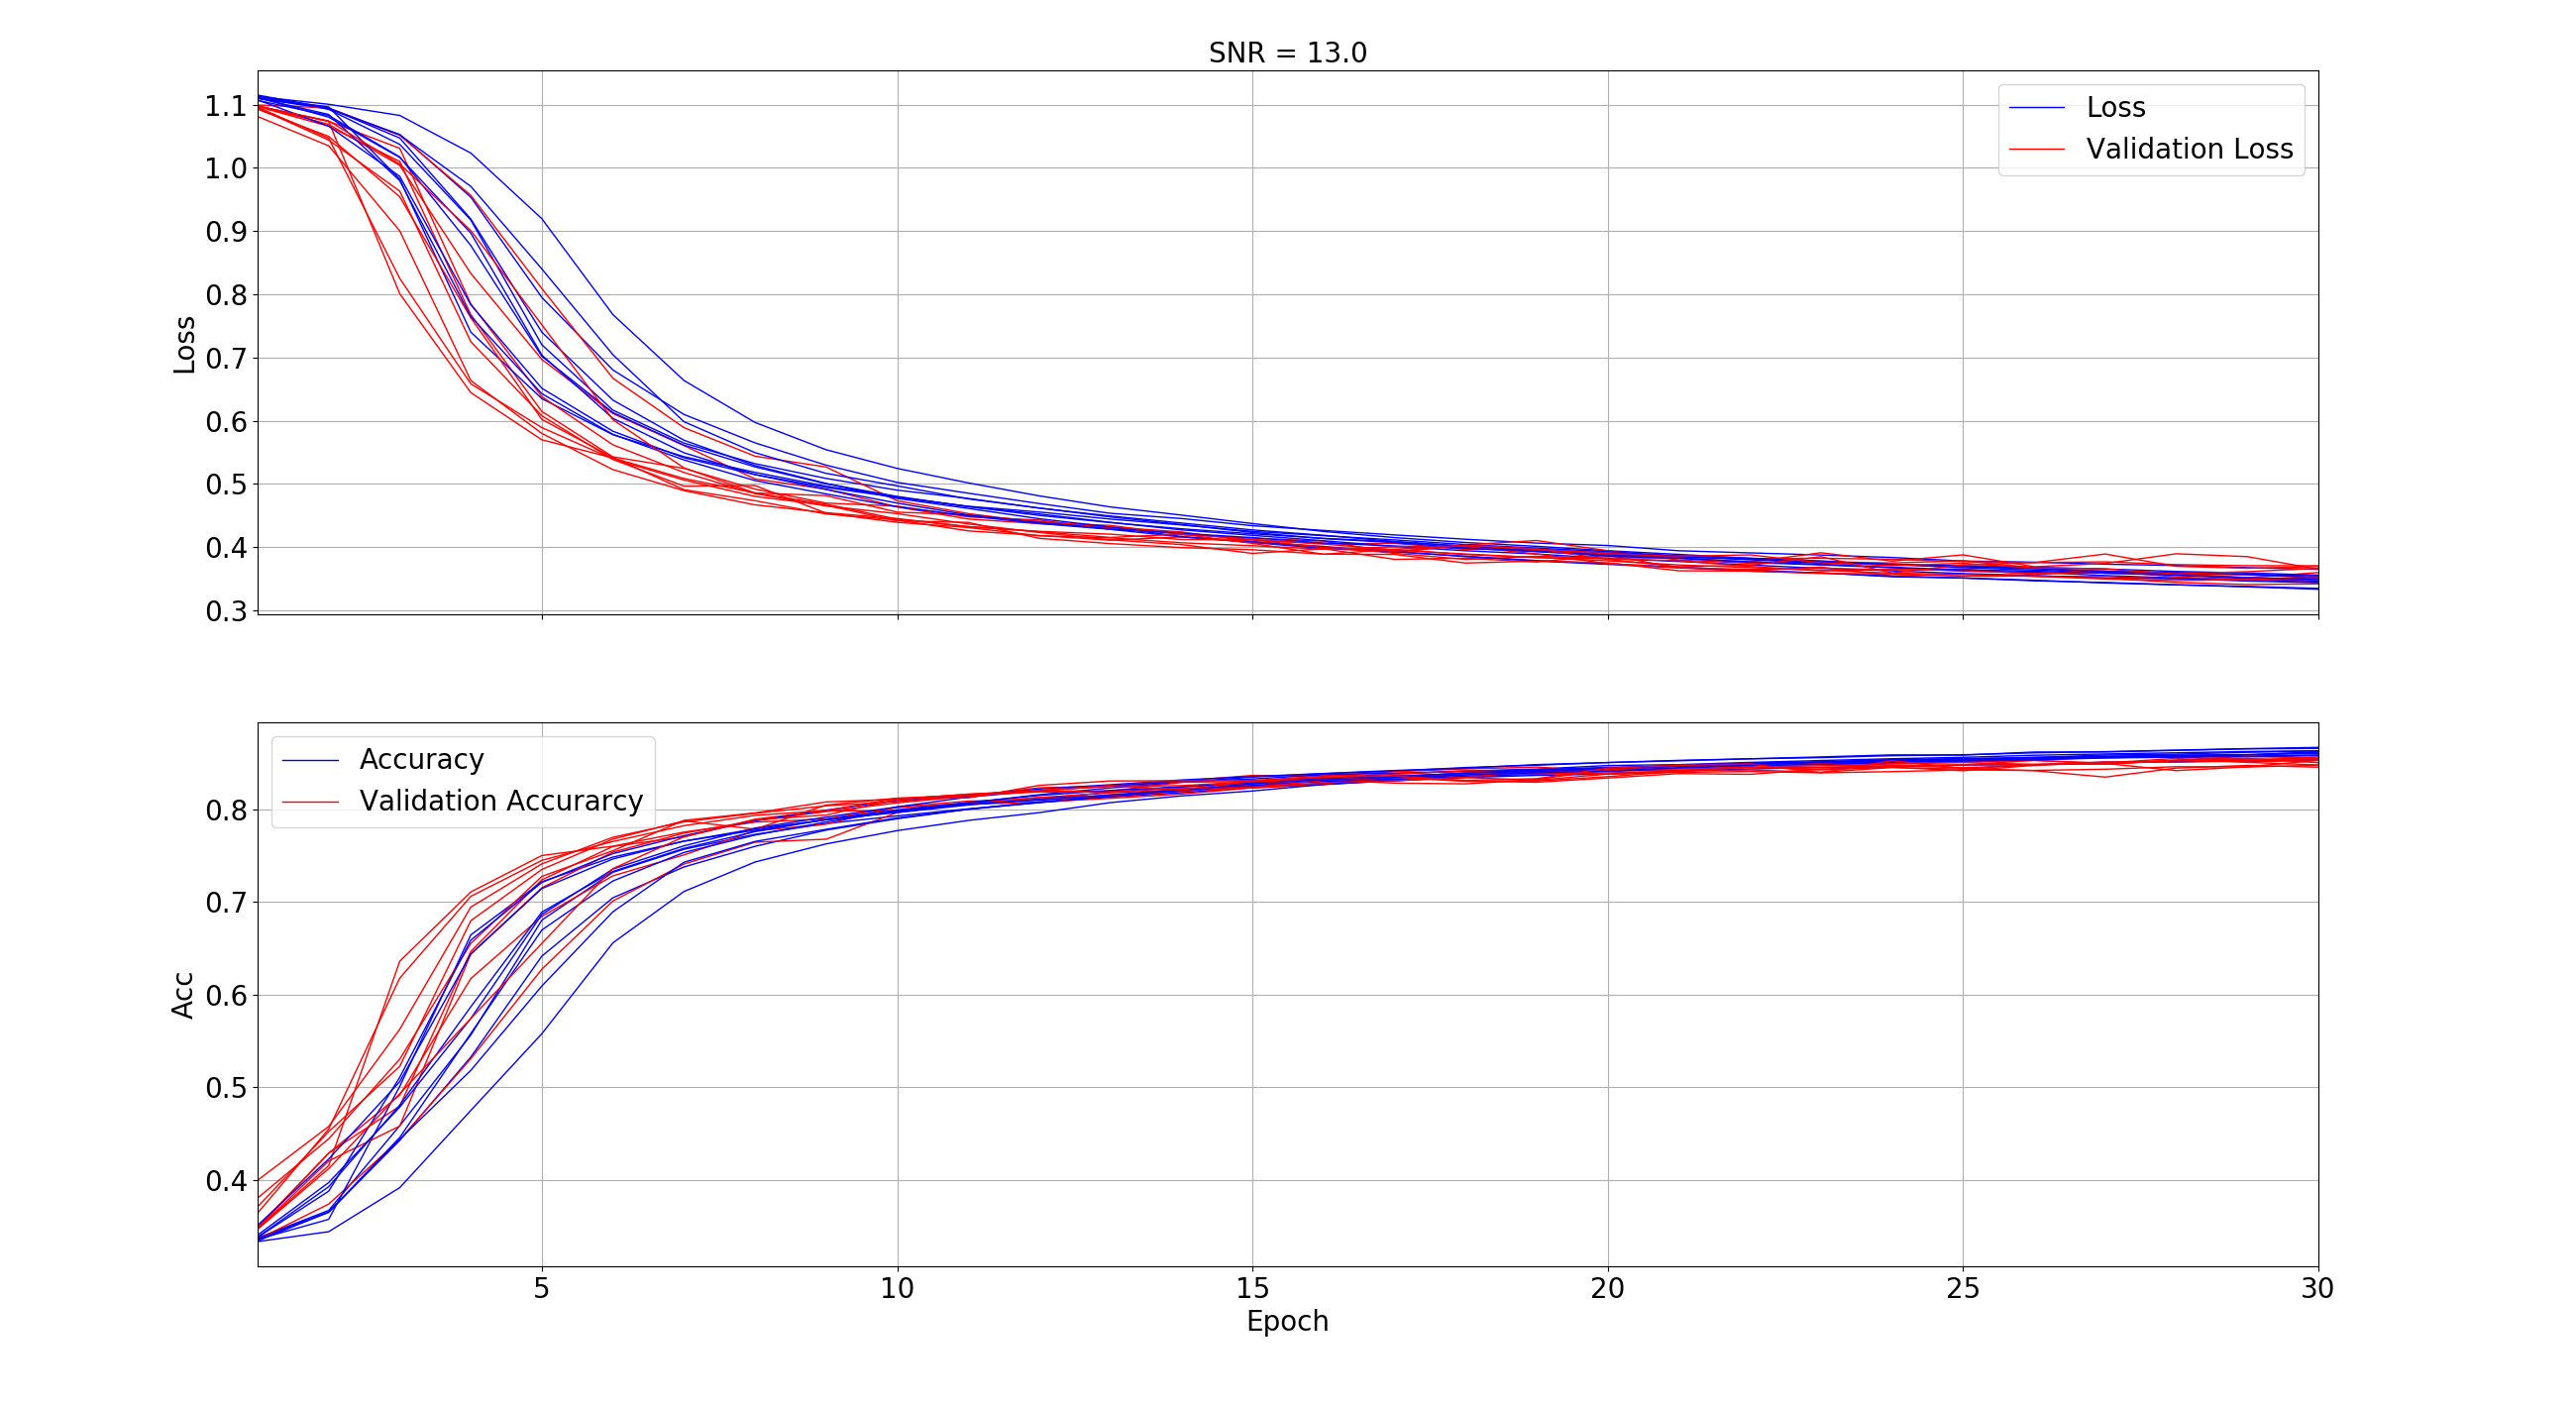

In [19]:
image = Image.open('Loss_plots_SNR_13.0_fixed_threshold-1.png')
image

# Figure 20. Loss plot for SNR = 14

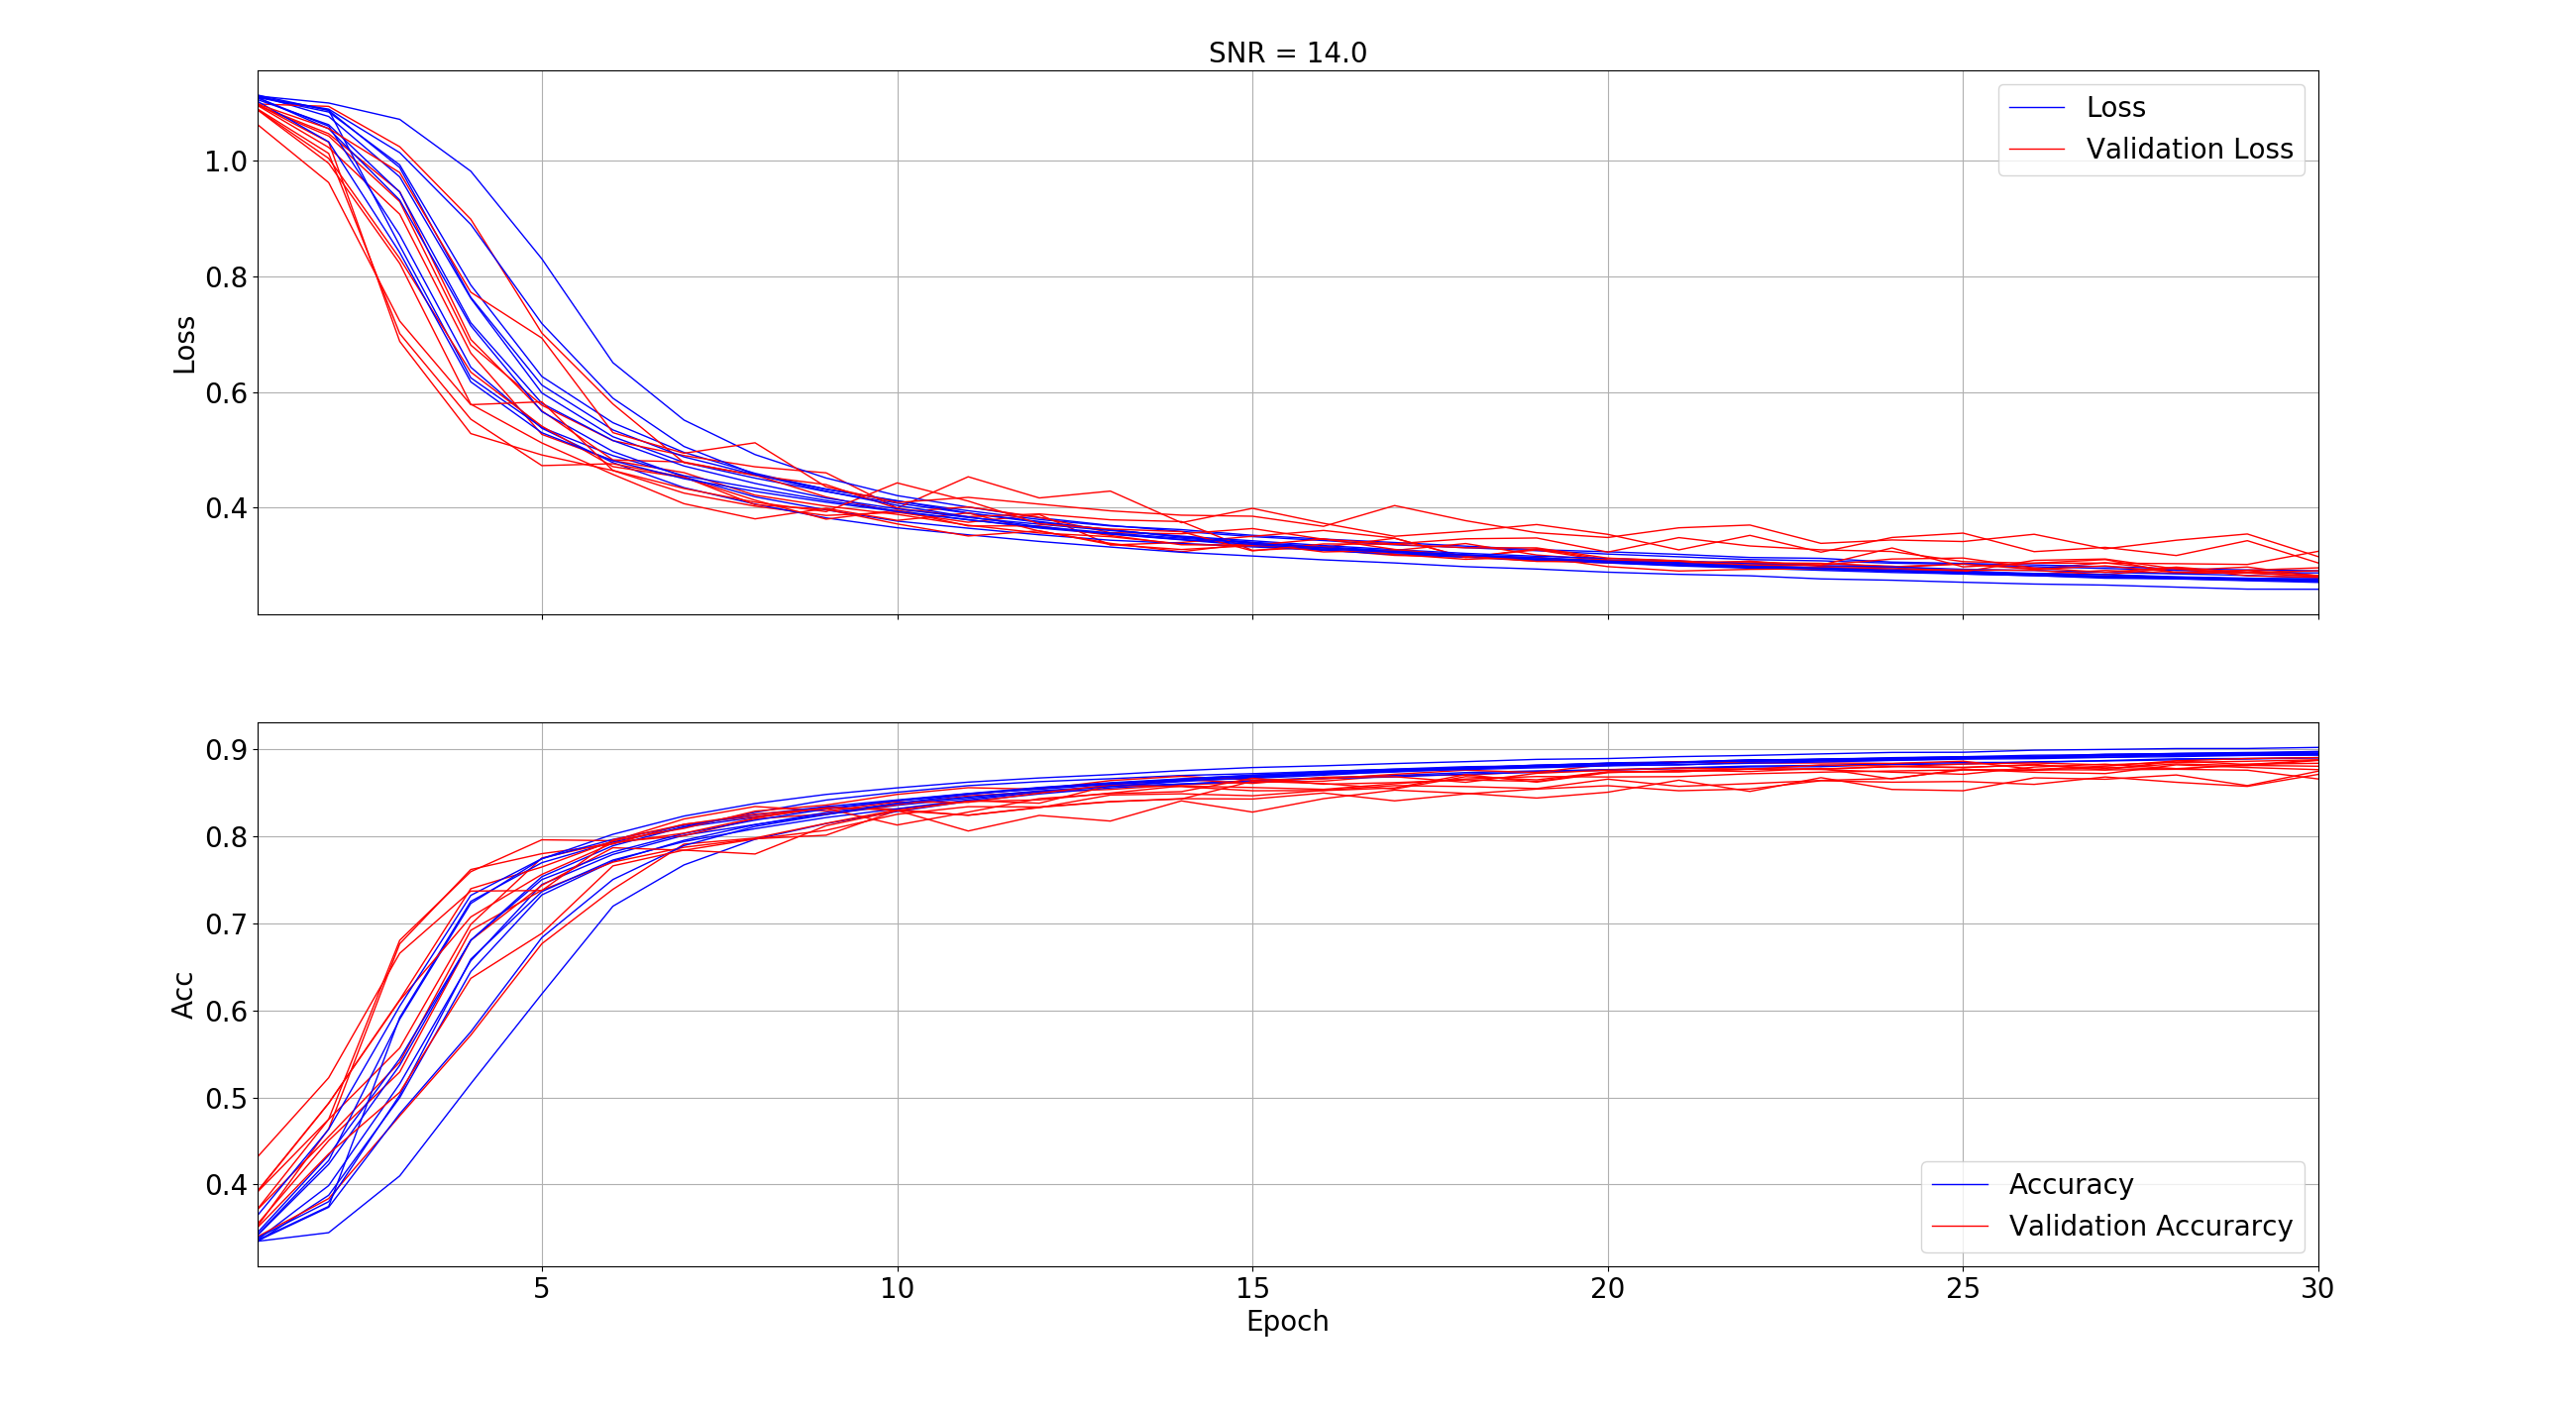

In [20]:
image = Image.open('Loss_plots_SNR_14.0_fixed_threshold-1.png')
image

# Figure 21. Loss plot for SNR = 15

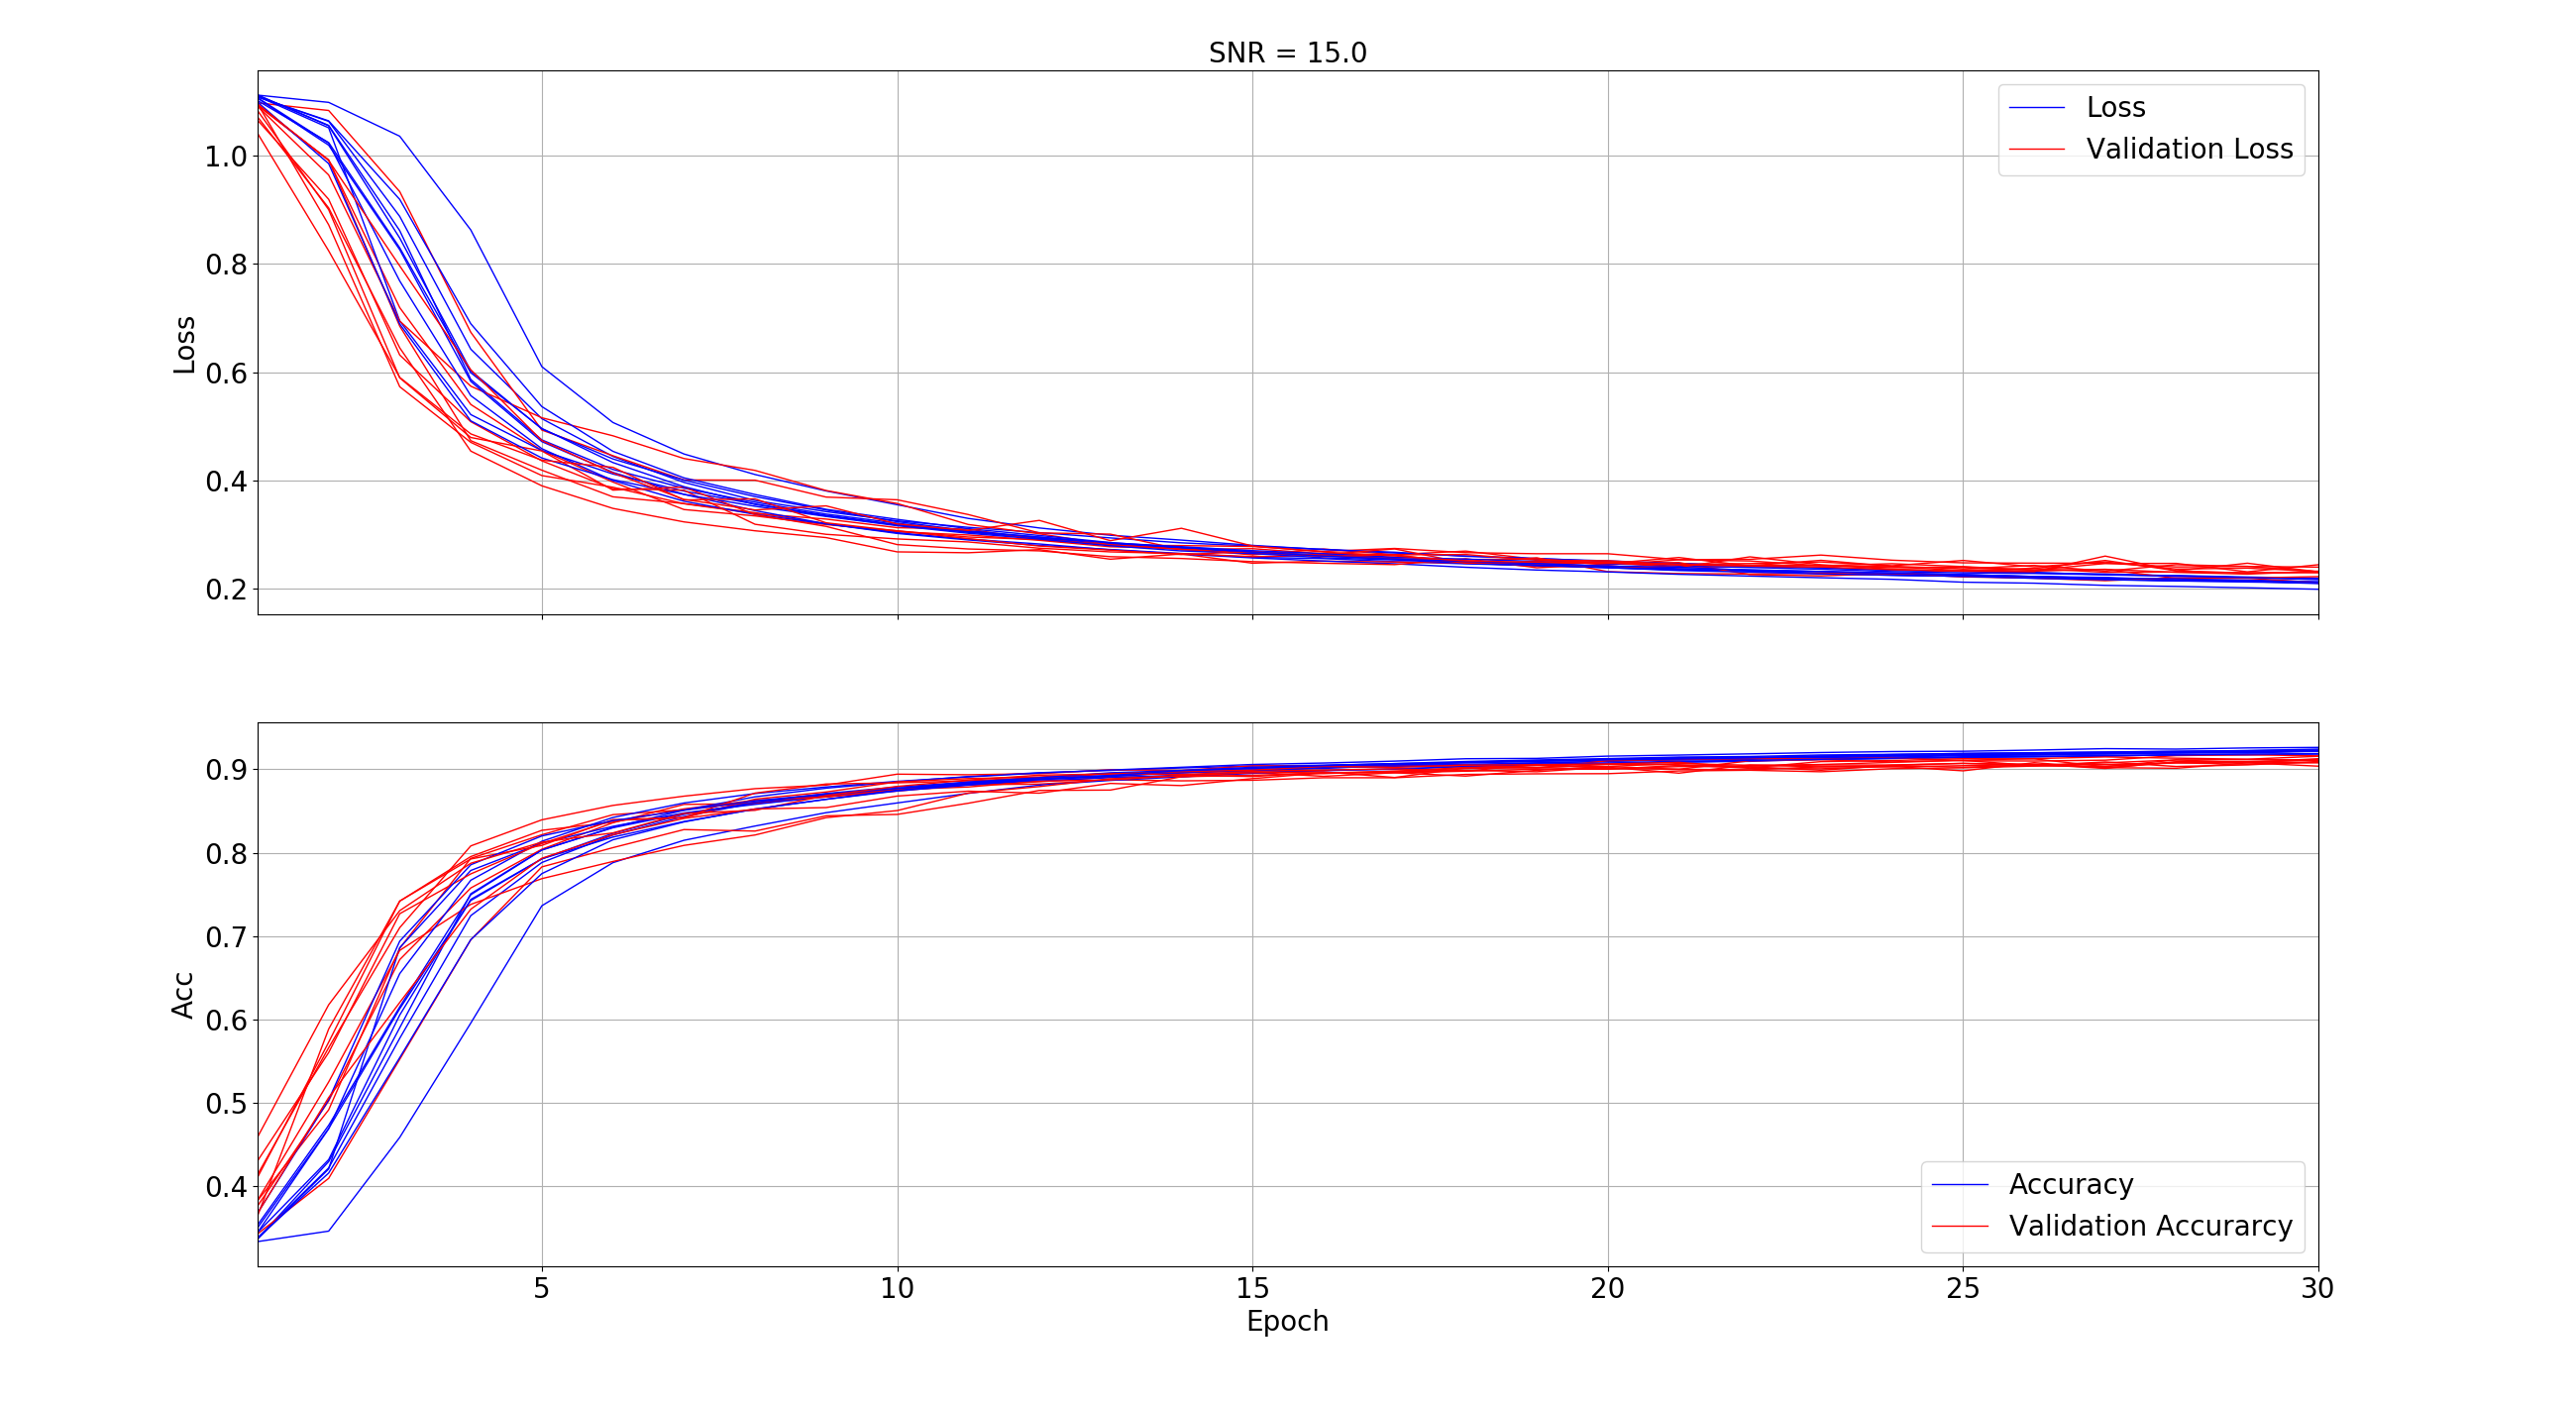

In [21]:
image = Image.open('Loss_plots_SNR_15.0_fixed_threshold-1.png')
image

In [ ]:
model = Sequential()

model.add(Conv2D(9, (1, 32), activation='elu', input_shape=input_shape, padding='same'))

model.add(MaxPool2D((1, 8)))

model.add(Conv2D(13, (1, 16), activation='elu', padding='same'))

model.add(MaxPool2D((1, 4)))

model.add(Conv2D(13, (1, 16), activation='elu', padding='same'))

model.add(Conv2D(13, (1, 16), activation='elu', padding='same'))

model.add(Conv2D(13, (1, 12), activation='elu', padding='same'))

model.add(Conv2D(15, (1, 12), activation='elu', padding='same' ))

model.add(Conv2D(15, (1, 12), activation='elu', padding='same'))

model.add(Conv2D(15, (1, 8), activation='elu', padding='same'))

model.add(Conv2D(15, (1, 8), activation='elu', padding='same'))

model.add(MaxPool2D((1, 4)))

model.add(Flatten())

model.add(Dense(64, activation='elu'))

model.add(Dropout(0.5))

model.add(Dense(32, activation='elu'))

model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))
